# Исследование данных о российском кинопрокате



Заказчик исследования — Министерство культуры Российской Федерации.
Требуется изучить рынок российского кинопроката и выявить текущие тренды. 

Особое внимание нужно уделить фильмам, которые получили государственную поддержку, а также восприятие их зрителем.

В исследовании используются данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

В первой части данные будут обработаны, добавлены отдельные столбцы к ним для дальнейшего исследования, а во второй части будет проведен анализ отечественных фильмов, получивших поддержку государства, их окупаемость, рейтинги, а также облик российского рынка кино.

### Загрузка данных и объединение датасетов

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Сначала откроем прочитаем оба датафрейма и поймем, что к чему.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)
data1 = pd.read_csv('mkrf_movies.csv')
data2 = pd.read_csv('mkrf_shows.csv')
data1.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [2]:
data2.head(5)

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Итого есть большой датафрейм с данными по фильмам и второй с данными по сборам. Казалось бы, все просто, и можно объединять по номеру прокатного удостоверения, но для начала поймем, какие типы данных в столбцах.

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Попробуем перевести прокатные удостоверения в числовой тип для объединения по ним.

In [5]:
data1[data1['puNumber'].str.isalpha()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Нашелся единственный фильм без прокатного удостоверения.

При всем уважении к татарской культуре, придется распрощаться с этим фильмом. Тем более по нему нет вообще никаких данных по бюджетам, рейтингу, финансированию и жанру. Конечно, можно надергать данные из гугла и заполнить пропуски, но фактически потеря одного фильма вряд ли повлияет на общее исследование, тем более, что строка нам активно мешает своим существованием.

In [6]:
data1 = data1.drop(index=[1797]).reset_index()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7485 non-null   int64  
 1   title                  7485 non-null   object 
 2   puNumber               7485 non-null   object 
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

In [7]:
data1['puNumber'] = data1['puNumber'].astype(int)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7485 non-null   int64  
 1   title                  7485 non-null   object 
 2   puNumber               7485 non-null   int32  
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

Теперь типы значений в столбце прокатного удостоверения одинаковы, поэтому можем провести слияние двух таблиц в одну.

In [8]:
data = data1.merge(data2, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7485 non-null   int64  
 1   title                  7485 non-null   object 
 2   puNumber               7485 non-null   int32  
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

Теперь можно приступать к предобработке и исследованию.

### Предобработка данных

#### Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Сразу видно, что нужно преобразовать дату и время в нужный формат, а также перевести рейтинги в числовой формат.

Начнем с последнего.

In [9]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [10]:
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings']=data['ratings'].astype(float)
data.loc[(data['ratings'] >10.0), 'ratings'] = data.loc[(data['ratings'] >10.0), 'ratings']/10
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Теперь с рейтингами можно оперировать нормально. При этом, отсутствие рейтинга не означает, что фильм неудачный. Может оказаться и так, что данные не подгружены, либо фильмы мало смотрели и они неизвестны зрителю, либо что-нибудь еще.

In [11]:
data.loc[data['ratings'].isna()]

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.00
7480,7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таких значений весьма много. Поэтому, скорее всего будет логичнее всего заполнить их медианным значением по типу фильма.

Однако данный момент мы оставим немного на потом, когда добавим столбцы с основным жанром фильма.

Переведем дату показа в корректный формат для дальнейшей работы и исследования.

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  7485 non-null   int64              
 1   title                  7485 non-null   object             
 2   puNumber               7485 non-null   int32              
 3   show_start_date        7485 non-null   datetime64[ns, UTC]
 4   type                   7485 non-null   object             
 5   film_studio            7467 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7476 non-null   object             
 8   producer               6917 non-null   object             
 9   age_restriction        7485 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

Приведем наименования столбцов к единому формату и регистру.

In [13]:
data.rename(columns={'puNumber': 'pu_number'}, inplace=True)
data.columns

Index(['index', 'title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Изучим уникальные значения типов фильмов и приведем их к единому виду, убрав лишние символы.

In [14]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [15]:
data['type'] = data['type'].replace(' ','').str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Изучим данные в списке стран-производителей и приведем их к единому виду. Уберем лишние пробелы, упростим наименования и прочее.

In [16]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [17]:
data['production_country'] = data['production_country'].replace('Республика|Республика ','', regex=True).str.strip()
data['production_country'] = data['production_country'].replace(' - ','-', regex=True).str.strip()
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'Новая Зеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США-Франция', 'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобритания-Франция-США', 'Н

In [18]:
data['production_country'] = data['production_country'].replace('Объединенные Арабские Эмираты','ОАЭ', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Китай','КНР', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('- ','-', regex=True).str.strip()
data['production_country'] = data['production_country'].replace(',',', ', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('К;анада','Канада', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Норвения','Норвегия', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Голландия','Нидерланды', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Бенльгия','Бельгия', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Ю.Корея','Южная Корея', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Н.Зеландия','Новая Зеландия', regex=True).str.strip()
data['production_country'] = data['production_country'].replace('Сша','США', regex=True).str.strip()
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР,  Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'Новая Зеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия,  Казахстан,  США', 'СССР,  Швеция',
       'СССР,  Франция,  Англия,  Куба,  ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР,  ЧССР,  Западный Берлин,  ПНР', 'СССР,  Италия',
       'Гонконг,  КНР', 'США-Франция',
       'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР,  Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобрит

При этом намеренно не будем заменять Чехословакию на ЧССР, поскольку ЧССР страна перестала называться в 1990 году, а Чехословакией - только в 1992 году, и вообще разделилась на Чехию и Словакию. То же самое относится и к ПНР, ВНР, ГДР.
Однако некоторые ошибки и двойные названия мы привели к единообразию.

В процессе изучения было обнаружено, что вместо наименования страны у одного фильма стоит "2019".

Далее с помощью гугла по названию фильма была найдена страна происхождения - Германия. Заменим значение на верное.

In [19]:
data.loc[data['production_country'] == '2019']

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,7247,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


In [20]:
data.loc[data['production_country'] == '2019', 'production_country'] = 'Германия'
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР,  Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'Новая Зеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия,  Казахстан,  США', 'СССР,  Швеция',
       'СССР,  Франция,  Англия,  Куба,  ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР,  ЧССР,  Западный Берлин,  ПНР', 'СССР,  Италия',
       'Гонконг,  КНР', 'США-Франция',
       'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР,  Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобрит

На всякий случай удалим лишние пробелы в именах режиссеров.

In [21]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [22]:
data['director'] = data['director'].str.strip()

И проделаем то же самое с продюсерами.

In [23]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [24]:
data['producer'] = data['producer'].str.strip()

Ради интереса посмотрим, какие значения в столбце "продюсер" пустые.

In [25]:
data.loc[data['producer'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00
9,9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7405,7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7406,7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7407,7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


Интересно, что в показываемых нам данных фильмы без продюсера - это бывший соцлагерь. Скорее всего, так и есть, поскольку в социалистических странах, по образу и подобию СССР, киноиндустрия финансировалась местным Госкино до развала ОВД и СССР.

In [26]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В возрастных рейтингах проблем нет.

In [27]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

В источниках финансирования - аналогично

In [28]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Жанров - великое множество комбинаций. Поэтому пока оставим их как есть, далее будем работать с этим столбцом более детально.

In [29]:
data['title'] = data['title'].replace('_','', regex=True).str.strip()
data['title'] = data['title'].replace('ё','е', regex=True).str.strip()
data['title'].value_counts()

День святого Валентина                          5
Химера                                          4
Там, где живут чудовища                         4
Рапунцель: Запутанная история                   4
Знакомство с Факерами 2.                        4
                                               ..
Прерванный полет                                1
Вне времени (2014)                              1
Виктория                                        1
Каждое воскресенье. Следующая глава             1
Машины песенки. Серия "Когда цветут кактусы"    1
Name: title, Length: 6749, dtype: int64

Обратим сразу внимание, что есть явные дубликаты, которые встречаются в датафрейме более 1 раза. Это может быть как задвоением записи, так и иными причинами, с ними разберемся чуть позже.

In [30]:
data.columns

Index(['index', 'title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Остались колонки с финансированием фильмов и господдержкой и сборами. Для удобства работы переведем суммы в тысячи рублей.

In [31]:
data['budget'] = data['budget']/1000
data['budget'].unique()

array([        nan,   79411.9  ,   37142.857,  176023.49 ,   40574.14 ,
         40015.122,   51850.   ,  220588.394,   86210.067,  139551.503,
         48571.43 ,   80000.   ,   36259.5  ,   70876.172,  252489.571,
         74910.   ,       0.   ,   89782.312,  436437.176,   40500.   ,
         68490.606,   45006.609,  131000.   ,  500000.   ,   61011.407,
         40000.   ,   37371.262,   35296.95 ,   43000.   ,   77401.751,
         35000.   ,   51196.711,   90120.   ,  267288.892,   49280.496,
         49071.428,   46968.883,   55195.   ,  156360.666,   37424.796,
         35760.06 ,   28115.58 ,   37943.652,  138325.738,   42252.509,
         39990.   ,  112000.   ,   55729.424,   35714.286,  139357.211,
         50218.741,   40265.   ,   39057.971,   92500.   ,   41497.86 ,
         86236.394,   80324.137,  240153.9  ,  100274.436,   40287.77 ,
         28571.429,   38476.869,   27000.   ,   81612.411,   64030.08 ,
         80273.277,  360000.   ,  130619.336,   52860.   ,  1117

Вполне приемлемые показатели. Это значит, что в общем и форматирование и методика работают - поэтому аналогично переведем в более читаемый вид остальные экономические показатели.

In [32]:
data['refundable_support'] = data['refundable_support']/1000
data['nonrefundable_support'] = data['nonrefundable_support']/1000
data['box_office'] = data['box_office']/1000

In [33]:
data['refundable_support'].value_counts()

0.00         221
20000.00      12
10000.00      10
25000.00      10
5000.00        9
15000.00       9
40000.00       8
50000.00       8
30000.00       7
60000.00       6
100000.00      5
55000.00       2
75000.00       2
110000.00      2
19000.00       2
3500.00        1
26000.00       1
28000.00       1
180000.00      1
35000.00       1
115000.00      1
8000.00        1
7346.88        1
7000.00        1
7153.12        1
36000.00       1
38000.00       1
150000.00      1
44000.00       1
17000.00       1
29000.00       1
9000.00        1
41000.00       1
80000.00       1
Name: refundable_support, dtype: int64

In [34]:
data['nonrefundable_support'].value_counts()

25000.00    53
30000.00    48
35000.00    29
40000.00    26
20000.00    19
            ..
51000.00     1
4700.00      1
5300.00      1
21700.00     1
3000.00      1
Name: nonrefundable_support, Length: 75, dtype: int64

In [35]:
data['box_office'].value_counts()

0.00        24
0.20        13
0.30        12
0.36         9
0.50         8
            ..
60531.05     1
2060.82      1
1544.99      1
322.28       1
219.57       1
Name: box_office, Length: 2938, dtype: int64

В дальнейшем будем иметь в виду, что в этих колонках данные указаны в тысячах рублей.

#### Работа с пропусками

Оценим общий масштаб наличия пропусков в данных.

In [36]:
data.isna().sum()

index                       0
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Начнем с малого и посмотрим пропуски по стране.

In [37]:
data.loc[data['production_country'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194.53
4440,4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Оба фильма сделаны в России, поэтому можно заполнить пропуски значениями.

In [38]:
data['production_country'] = data['production_country'].fillna(value='Россия')
data.isna().sum()

index                       0
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Перейдем к режиссерам.

In [39]:
data.loc[data['director'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44.35
1735,1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4440,4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4922,4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Обратим внимание, что у МультЛичностей весьма много пропусков, впоследствии мы их заполним.

Также интересно то, что продюсер не указан у трех татарских фильмов от "Барс-Рекордс", а также у некоторых концертных фильмов. И если по МультЛичностям можно найти установочные данные, то по остальным пропускам - проблемно или почти невозможно. Поэтому заполним то, что можем заполнить.

In [40]:
data.loc[(data['title'] == 'Мульт личности. Выпуск 5')&(data['pu_number'] == 214000410), 'director'] = 'Василий Пичул, Юрий Владовский'
data.loc[data['director'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44.35
1735,1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4922,4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [41]:
data.loc[data['film_studio'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,"Василий Пичул, Юрий Владовский",NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41.23
6484,6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data.isna().sum()

index                       0
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    8
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Записей с отсутствующими киностудиями всего 17. В принципе, в их наличии в данных нет особого смысла, но для чистоты исследования, особенно с учетом наличия отдельных данных по их рейтингам, сборам и прочему, пока их оставим в таблице.

Ликвидируем остальные пропуски у МультЛичностей - пропуск заполняется сразу из найденных уже данных по фильму. Остальные же, случайным поиском по трем вариантам, оказываются арт-хаусом и инди-кино, поэтому как правило такие фильмы снимаются либо независимо, либо еще как-нибудь (не в обиду их авторам).

In [43]:
data.loc[(data['title'] == 'Мульт личности. Выпуск 5')&(data['pu_number'] == 214000410), 'film_studio'] = 'Красный квадрат'
data.loc[(data['title'] == 'Мульт личности. Выпуск 5')&(data['pu_number'] == 214000410), 'producer'] = 'Константин Эрнст, Марина Даниелян, Давид Либерман, Даниил Либерман'

Теперь посмотрим уже упоминавшиеся ранее данные по отсутствию продюсера и связи этого с советским периодом.

In [44]:
data.loc[(data['producer'].isna())&(data['production_country'] == 'СССР')]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2.70
11,11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
15,15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7405,7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7406,7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7407,7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [45]:
data.loc[(data['producer'].notna())&(data['production_country'] == 'СССР')]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3925,3926,Сафари № 6,111001611,2011-02-17 12:00:00+00:00,Художественный,ИП Аболс А.Р.,СССР,А.Аболс,А.Аболс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,военный,NaN
3930,3931,Сон в красном тереме,112000311,2011-02-17 12:00:00+00:00,Документальный,ИП Аболс А.Р.,СССР,"К.Котельников, А.Аболс",А.Аболс,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4380,4381,Монета,211012410,2010-03-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Алов, В.Наумов","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,драма,NaN
4381,4382,Вольный ветер.,211012610,2010-03-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"Л.Трауберг, А.Тутышкин","ФГУП ""Киноконцерн ""Мосфильм""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.50,"мюзикл,мелодрама,комедия",NaN
4382,4383,Пигмалион,211012710,2010-03-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Алексеев,"ФГУП ""Киноконцерн ""Мосфильм""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама,комедия",NaN


Немного вернемся к наблюдению об отсутствии продюсеров у советского кино - значений с указанными продюсерами всего пять. И из них три - Мосфильм, который и есть, фактически, Госкино.

Интересно, что у Андрея Аболса целых два спродюссированных им фильма. Фильмы сняты в 1990 и 1989 годах соответственно - время появления первого независимого от "линии партии" советского кино. Своего рода веха в развитии кинематографа в нашей стране.

In [46]:
data.isna().sum()

index                       0
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                17
production_country          0
director                    8
producer                  567
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  7485 non-null   int64              
 1   title                  7485 non-null   object             
 2   pu_number              7485 non-null   int32              
 3   show_start_date        7485 non-null   datetime64[ns, UTC]
 4   type                   7485 non-null   object             
 5   film_studio            7468 non-null   object             
 6   production_country     7485 non-null   object             
 7   director               7477 non-null   object             
 8   producer               6918 non-null   object             
 9   age_restriction        7485 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

В итоге по данным о наличии пропусков и общим данным о датафрейме, можно явно выделить фильмы производства России с выделявшимся госфинансированием (всего 332 записи), а также заметить, что около 1000 фильмов не имеют записи о жанре и рейтинге. При этом, есть все записи в категории фильма и в основных установочных данных. 

С одной стороны, можно рассчитать средний рейтинг по типу фильма, но при прочих равных условиях это недостаточно верный подход, поскольку рейтинг будет "средним по больнице" и не будет отражать реальной картины относительно достаточно большого количества пропусков. При этом, если рассматривать отдельные варианты фильмов (независимое кино, инди-проекты, артхаус), то велика вероятность дать заниженный рейтинг истинным шедеврам, либо незаслуженно высокий откровенно "проходным" картинам.

В дальнейшем исследовании будет интересно обратить внимание на рейтинги фильмов, получивших господдержку, и, учитывая тенденцию давать бюджетные деньги на массовые типы/жанры фильмов, будет необходимо заполнить пропуски при их наличии. Однако данная операция будет проводиться по части датафрейма, и логичнее всего оставить дополнение на потом.

Как уже указывалось ранее, отсутствующие данные по продюсерам фильмов, скорее всего, связаны с появлением этих фильмов в странах соцлагеря, поэтому априори пропуски незаполнимы.

Отсутствие же пропусков по сборам фильмов может быть вызвано множеством иных факторов, например, отсутствием информации по старым фильмам, выходившим в послевоенные годы, либо в соцлагере, либо ввиду их "нетаковости". Без тщательного исследования каждого фильма и сличения с данными из открытых источников в Сети пропуски заполнить невозможно, поэтому их наличие предположим само собой разумеющимся ввиду несовершенства выгрузки.

#### Работа с дубликатами

Изучим наличие дубликатов во всем датафрейме. Среди всех столбцов это могут быть прокатные удостоверения и названия.

In [48]:
data.duplicated('title').sum()

736

In [49]:
data.duplicated('pu_number').sum()

2

Итого в прокатных удостоверениях всего два дубликата - удалим их, поскольку одинаковые прокатные удостоверения не могут быть у двух разных фильмов. Поэтому считаем появление дубликатов в прокатных задвоением.

In [50]:
data['pu_number'] = data['pu_number'].drop_duplicates()

In [51]:
data['pu_number'].value_counts()[data['pu_number'].value_counts()>1]

Series([], Name: pu_number, dtype: int64)

In [52]:
data = data.drop(data[data['pu_number'].isna()].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  7483 non-null   int64              
 1   title                  7483 non-null   object             
 2   pu_number              7483 non-null   float64            
 3   show_start_date        7483 non-null   datetime64[ns, UTC]
 4   type                   7483 non-null   object             
 5   film_studio            7466 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7475 non-null   object             
 8   producer               6916 non-null   object             
 9   age_restriction        7483 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

Ничего не осталось, ушло две записи, поэтому переходим к названиям фильмов, которые могли так или иначе задвоиться.

In [53]:
data['title'].value_counts()[data['title'].value_counts()>1]

День святого Валентина                   5
Шерлок Холмс                             4
Секс в большом городе 2                  4
Лузеры                                   4
Кошки против собак: Месть Китти Галор    4
                                        ..
Однажды в Риме                           2
Таймер                                   2
Книга жизни                              2
Великие битвы России                     2
Отчаянная домохозяйка                    2
Name: title, Length: 575, dtype: int64

С учетом того, что дубли прокатных удостоверений удалены, каждый из фильмов, несмотря на повторения в датафрейме, имеет свое уникальное прокатное удостоверение. И имеет свою уникальную дату проката.

Таким образом, дубли могут быть показателями того, что фильмы в разное время получали прокатные для разных целей: фестивали, кинотеатры, телевидение, онлайн-сервисы.

Соответственно, даже несмотря на наличие дублей в названиях, нельзя избавляться от данных дубликатов насовсем. Суммы сборов на разных площадках, средний рейтинг фильма среди разных источников и прочие статистические показатели будут неполными без удаленных дублей. Поэтому в данном исследовании пока что оставляем их "как есть".

#### Работа с категориальными значениями

In [54]:
data['type'].value_counts()

Художественный                5906
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Типы фильмов уже исправили выше.

При всем прочем интересно посмотреть на распределение фильмов по типам. Что логично, художественные игровые фильмы в большинстве. И очень мало научпопа и всего один музыкальный фильм. Определенно такое распределение весьма показательно в изучении развития киноиндустрии со временем.

И, возможно, в дальнейшем будет интересно понаблюдать за динамикой выхода фильмов по годам.

При этом второе категориальное значение - жанр фильма, и его мы привели в соответствие аналогично ранее. Насколько смогли. По списку уникальных значений было видно, что жанров фильмов великое множество, и многие из них идут перечислением, что осложнит дальнейшее исследование. Поэтому далее введем дополнительный столбец с "основным жанром", который упростит исследование.

#### Проверка количественных значений

Следуя законам логики, бюджет должен быть как минимум больше одного из видов поддержки.
Поэтому посмотрим на часть данных с бюджетами и поддержкой внимательней.

In [55]:
budg_pivot = data[['budget', 'refundable_support', 'nonrefundable_support']]
budg_pivot[budg_pivot.notna().any(axis=1)]

,budget,refundable_support,nonrefundable_support
1281,79411.90,0.00,26500.00
1448,37142.86,0.00,26000.00
1498,176023.49,0.00,107847.95
1524,40574.14,0.00,28000.00
1792,40015.12,0.00,25000.00
...,...,...,...
7463,980000.00,100000.00,400000.00
7465,190000.00,100000.00,0.00
7473,944000.00,100000.00,400000.00
7475,46154.00,0.00,30000.00


Всего 332 строки.

Выделим отдельно строки, где бюджет нулевой, а поддержка - нет. Наличие таких записей будет искажать общее исследование, поэтому их нужно исправить.

In [56]:
budg_pivot[(budg_pivot['budget'] == 0) & ((budg_pivot['refundable_support'] != 0)|(budg_pivot['nonrefundable_support'] != 0))]

,budget,refundable_support,nonrefundable_support
2052,0.00,0.00,23000.00
2057,0.00,0.00,75000.00
2471,0.00,10000.00,70000.00
2531,0.00,20000.00,0.00
2614,0.00,60000.00,100000.00
2683,0.00,0.00,59000.00
2787,0.00,0.00,35000.00
2873,0.00,0.00,6000.00
3046,0.00,19000.00,51000.00
3564,0.00,0.00,250000.00


Действительно, такие фильмы есть. Ради интереса посмотрим их названия.

In [57]:
data[(data['budget'] == 0) & ((data['refundable_support'] != 0)|(data['nonrefundable_support'] != 0))]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,2053,14+,111023614.00,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234.02
2057,2058,Дуxless 2,111000415.00,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000.00,0.00,Фонд кино,6.60,драма,446163.51
2471,2472,Воин (2015),111017315.00,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000.00,70000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572.44
2531,2532,Бармен.,111009615.00,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418.97
2614,2615,Савва. Сердце воина,114001715.00,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000.00,100000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487.55
2683,2684,Тряпичный союз,111010215.00,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000.00,0.00,Фонд кино,6.30,"комедия,драма",1957.74
2787,2788,Срочно выйду замуж,111017115.00,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937.78
2873,2874,Помню - не помню!,111004916.00,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000.00,0.00,Министерство культуры,4.30,комедия,15362.93
3046,3047,Любовь с ограничениями,111008216.00,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000.00,51000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299.05
3564,3565,Притяжение (2016),111018116.00,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000.00,0.00,Фонд кино,5.60,фантастика,1038321.49


Был бы я БэдКомедианом, я бы вставил сюда какую-нибудь едкую шутку про Притяжение и Духлесс 2.

<img src="https://cs9.pikabu.ru/post_img/big/2017/06/02/11/149642829212496210.jpg" alt="Вы знаете Руса"/>

По законам логики, фильм с поддержкой и без бюджета быть не может, как минимум поддержка и есть бюджет.

Поэтому заменим нулевой бюджет на сумму возвратной и безвозвратной поддержки.

In [58]:
data.loc[(data['budget'] == 0) & ((data['refundable_support'] != 0)|(data['nonrefundable_support'] != 0)), 'budget'] = \
    data.loc[(data['budget'] == 0) & ((data['refundable_support'] != 0)|(data['nonrefundable_support'] != 0)), 'refundable_support'] + \
    data.loc[(data['budget'] == 0) & ((data['refundable_support'] != 0)|(data['nonrefundable_support'] != 0)), 'nonrefundable_support']

In [59]:
data[data['title'] == 'Притяжение (2016)']

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3564,3565,Притяжение (2016),111018116.00,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000.00,250000.00,Фонд кино,5.60,фантастика,1038321.49


По "Притяжению" и проверили, что нулевые бюджеты заполнились данными о поддержке. Поэтому теперь можно убрать из датафрейма данные, где бюджет фильма меньше суммы возвратной и невозвратной поддержки, поскольку такие данные будут априори неверны и установить реальность невозможно.

In [60]:
data = data.drop(data[data['budget'] < data['refundable_support'] + data['nonrefundable_support']].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  7483 non-null   int64              
 1   title                  7483 non-null   object             
 2   pu_number              7483 non-null   float64            
 3   show_start_date        7483 non-null   datetime64[ns, UTC]
 4   type                   7483 non-null   object             
 5   film_studio            7466 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7475 non-null   object             
 8   producer               6916 non-null   object             
 9   age_restriction        7483 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

Судя по всему, больше изменений не было, значит записей, где бюджет меньше господдержки, нет. Фильмы, произведенные по возможно коррупционной схеме, не обнаружены, что не может не радовать.

На всякий случай проверим столбец со сборами фильмов. Если в нем есть отрицательные значения - удалим их, поскольку это противоречит логике (если, конечно, создатели не платили сами зрителям, чтобы их фильмы смотрели).

In [61]:
data['box_office'].value_counts()

0.00        24
0.20        13
0.30        12
0.36         9
0.50         8
            ..
60531.05     1
2060.82      1
1544.99      1
322.28       1
219.57       1
Name: box_office, Length: 2938, dtype: int64

Нулевые сборы тоже бывают, если фильм провалился в прокате. Однако и заполнять пропуски нулями неверно - фильм мог не попасть в прокат или распространяться на торрентах. Поэтому больше данные пока что не трогаем.

#### Дополнение данных

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [62]:
data['show_year'] = data['show_start_date'].dt.year

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  7483 non-null   int64              
 1   title                  7483 non-null   object             
 2   pu_number              7483 non-null   float64            
 3   show_start_date        7483 non-null   datetime64[ns, UTC]
 4   type                   7483 non-null   object             
 5   film_studio            7466 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7475 non-null   object             
 8   producer               6916 non-null   object             
 9   age_restriction        7483 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [64]:
def get_first_value(s):
    try:
        values = s.split(',')
        return values[0]
    except:
        pass

data['main_genre'] = data['genres'].apply(get_first_value)
data['main_director'] = data['director'].apply(get_first_value)

In [65]:
data.head(10)

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director
0,0,Открытый простор,221048915.00,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,боевик,Кевин Костнер
1,1,Особо важное задание,111013716.00,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,драма,Е.Матвеев
2,2,Особо опасен,221038416.00,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
3,3,Особо опасен,221026916.00,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
4,4,Особо опасен,221030815.00,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,фантастика,Тимур Бекмамбетов
5,5,Остановился поезд,111013816.00,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,драма,В.Абдрашитов
6,6,Любовь и голуби,111007013.00,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2.70,2013,мелодрама,В.Меньшов
7,7,Любовь и сигареты,221074614.00,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014,мюзикл,Джон Туртурро
8,8,Отпетые мошенники.,121011416.00,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016,комедия,Эрик Беснард
9,9,Отпуск за свой счет,111019114.00,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014,мелодрама,В.Титов


Теперь есть отдельные столбцы со значениями основного жанра и главного режиссера фильма. В случае их отсутствия - стоят пропуски.

На всякий случай посмотрим какие пропуски есть.

In [66]:
data[data['main_genre'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director
43,43,Мемуары гейши (по роману Артура Голдена),121000606.00,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,None,Роб Маршалл
150,150,Жди меня,111013615.00,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,None,А.Столпер
154,154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813.00,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,None,Вадим Перельман
159,159,Жемчужная девушка,224011014.00,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,None,Владимир Дрга
227,227,Полустанок,111026714.00,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,None,Б.Барнет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,7479,Эколав,111023219.00,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,None,Д.Григорьев
7479,7480,Акрам Хан: Родом из Карри Хауса,126007919.00,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219.57,2019,None,Ник Пойнц
7480,7481,Сад художника: Американский импрессионизм,126008019.00,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,None,Фил Грабски
7482,7483,Щенячий патруль: Скорей спешим на помощь!,124010819.00,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США-Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,None,Чарльз Е.Бастьен


Пропусков достаточно много, и заполнить их значениями вручную невозможно. Поэтому оставим их "как есть" в таблице, поскольку в строках могут содержаться иные важные для дальнейшего исследования данные.

In [67]:
data[data['main_director'].isna()]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director
764,764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512.00,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44.35,2012,None,None
1735,1735,Помпеи. Британский музей,126003413.00,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,None,None
3839,3840,Зур концерт (Большой концерт).,217027010.00,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,None,None
4051,4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310.00,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,None,None
4297,4298,Изге Вэли (Святой Валентин),217020610.00,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,None,None
4414,4415,Bon Jovi. The Circle Tour,126001710.00,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN,2010,концерт,None
4922,4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111.00,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,None,None
4941,4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711.00,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN,2011,концерт,None


Фильмы без режиссера - всё из ранее уже виденного нами списка записей с практически отсутствующими остальными установочными данными. Однако оставим их на месте, возможно они пригодятся в общем исследовании данных

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [68]:
data['state_support'] = (data['refundable_support'] + data['nonrefundable_support'])/data['budget']

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7484
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  7483 non-null   int64              
 1   title                  7483 non-null   object             
 2   pu_number              7483 non-null   float64            
 3   show_start_date        7483 non-null   datetime64[ns, UTC]
 4   type                   7483 non-null   object             
 5   film_studio            7466 non-null   object             
 6   production_country     7483 non-null   object             
 7   director               7475 non-null   object             
 8   producer               6916 non-null   object             
 9   age_restriction        7483 non-null   object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64          

### Исследовательский анализ данных


Изучим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

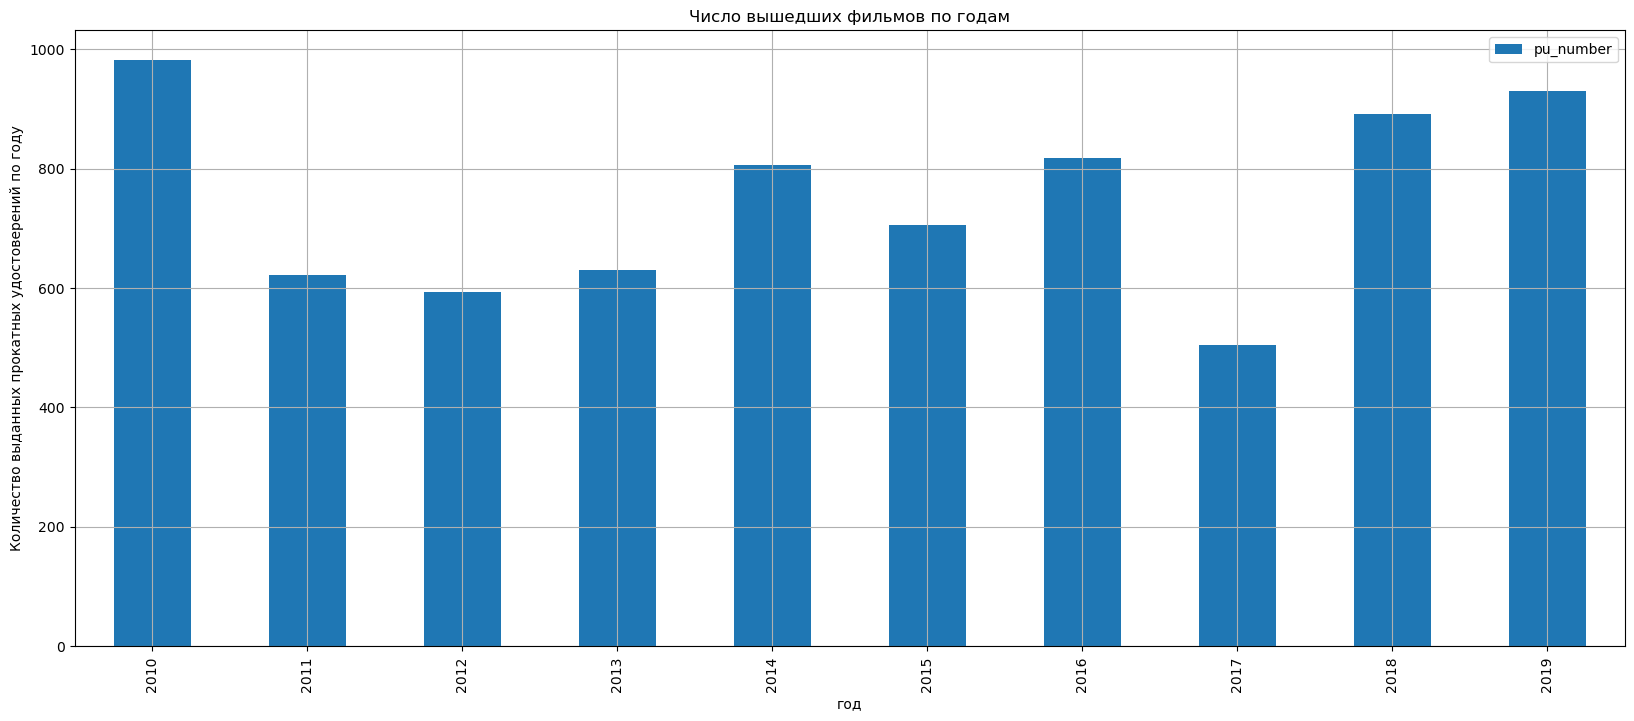

In [115]:
data.pivot_table(index='show_year', values='pu_number', aggfunc='count').plot(kind='bar',grid=True,figsize=(20,8),legend=True, xlabel = 'год',ylabel='Количество выданных прокатных удостоверений по году')
plt.title('Число вышедших фильмов по годам')
plt.show()

По графику видно, что в 2010 году в прокате было больше всего фильмов. Далее был спад с 2011 по 2013 год, после еще б*о*льший спад был в 2017 году и достаточно резкий рост в 2018 и 2019 годах. Весьма интересно будет далее рассмотреть динамику сборов по годам.

In [71]:
data['box_office'].count() / data['show_year'].count() * 100

42.202325270613386

Итого данные по сборам есть для 42,2% фильмов, которые указаны в таблице. В целом, это немалое количество.

In [72]:
data.pivot_table(index='show_year', values='box_office', aggfunc='count')

,box_office
show_year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


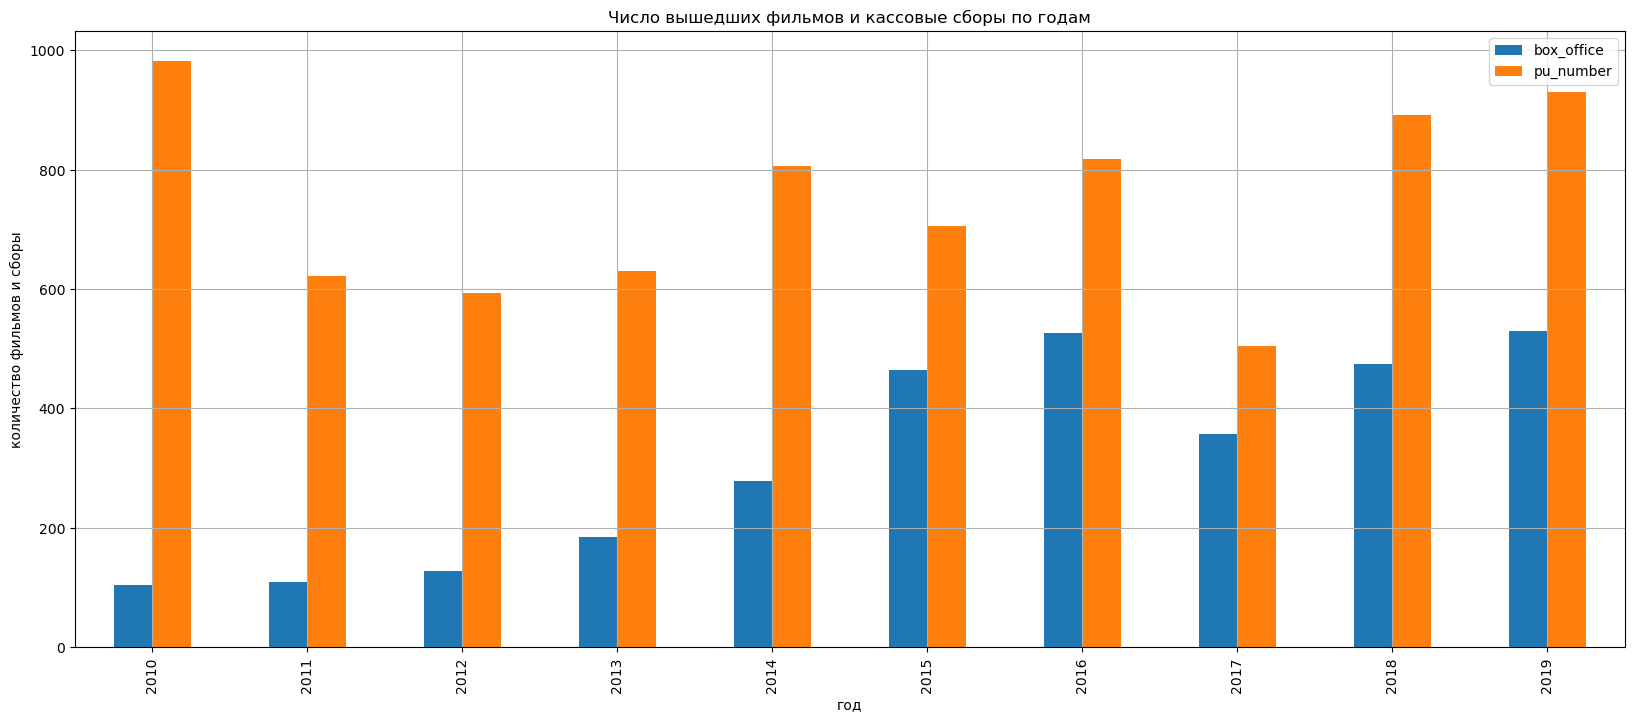

In [116]:
data.pivot_table(index='show_year', values=['box_office','pu_number'], aggfunc='count').plot(kind='bar',grid=True,figsize=(20,8),legend=True,xlabel='год', ylabel='количество фильмов и сборы')
plt.title('Число вышедших фильмов и кассовые сборы по годам')
plt.show()

In [125]:
box_share = data.pivot_table(index='show_year', values=['box_office','pu_number'], aggfunc='count').reset_index()
box_share['share'] = box_share['box_office']/ box_share['pu_number']*100
box_share

,show_year,box_office,pu_number,share
0,2010,105,983,10.68
1,2011,109,622,17.52
2,2012,128,593,21.59
3,2013,184,630,29.21
4,2014,279,806,34.62
5,2015,465,705,65.96
6,2016,526,818,64.30
7,2017,357,505,70.69
8,2018,475,891,53.31
9,2019,530,930,56.99


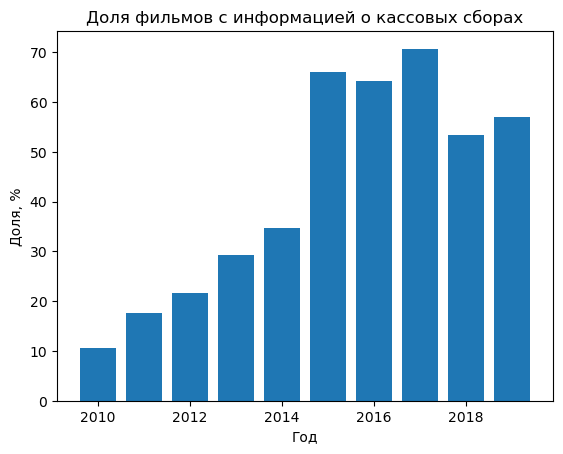

In [136]:
plt.bar(x=box_share['show_year'],height=box_share['share'])
plt.ylabel('Доля, %')
plt.xlabel('Год')
plt.title('Доля фильмов с информацией о кассовых сборах')
plt.show()

Можно заметить, что данных по сборам относительно прокатных удостоверений меньше всего в 2010 году. Постепенно разрыв уменьшается и начинается рост от 2014 года. Скорее всего, это связано с внедрением в эксплуатацию системы ЕАИС и увеличением количества кинотеатров, подключенных к ней. Можно заметить, что в 2015 году разрыв между числом фильмов с прокатным удостоверением и числом фильмов с имеющимися данными о сборах значительно сократился. После 2014 года доля фильмов со сборами относительно доли фильмов с прокатными удостоверениями увеличивалась и достигла максимума в 70% в 2017 году. В 2018 и 2019 году наблюдалась некоторая просадка в соотношении, но не в количестве, которая может быть связана с проведением различного рода кинофестивалей и выдачей прокатных удостоверений для демонстрации фильмов в иных, не учитывающихся в расчете кассовых сборов, местах (фестивали, онлайн-кинотеатры и прочее).  Продолжим исследование относительно динамики сборов.

Изучим, как менялась динамика проката по годам.

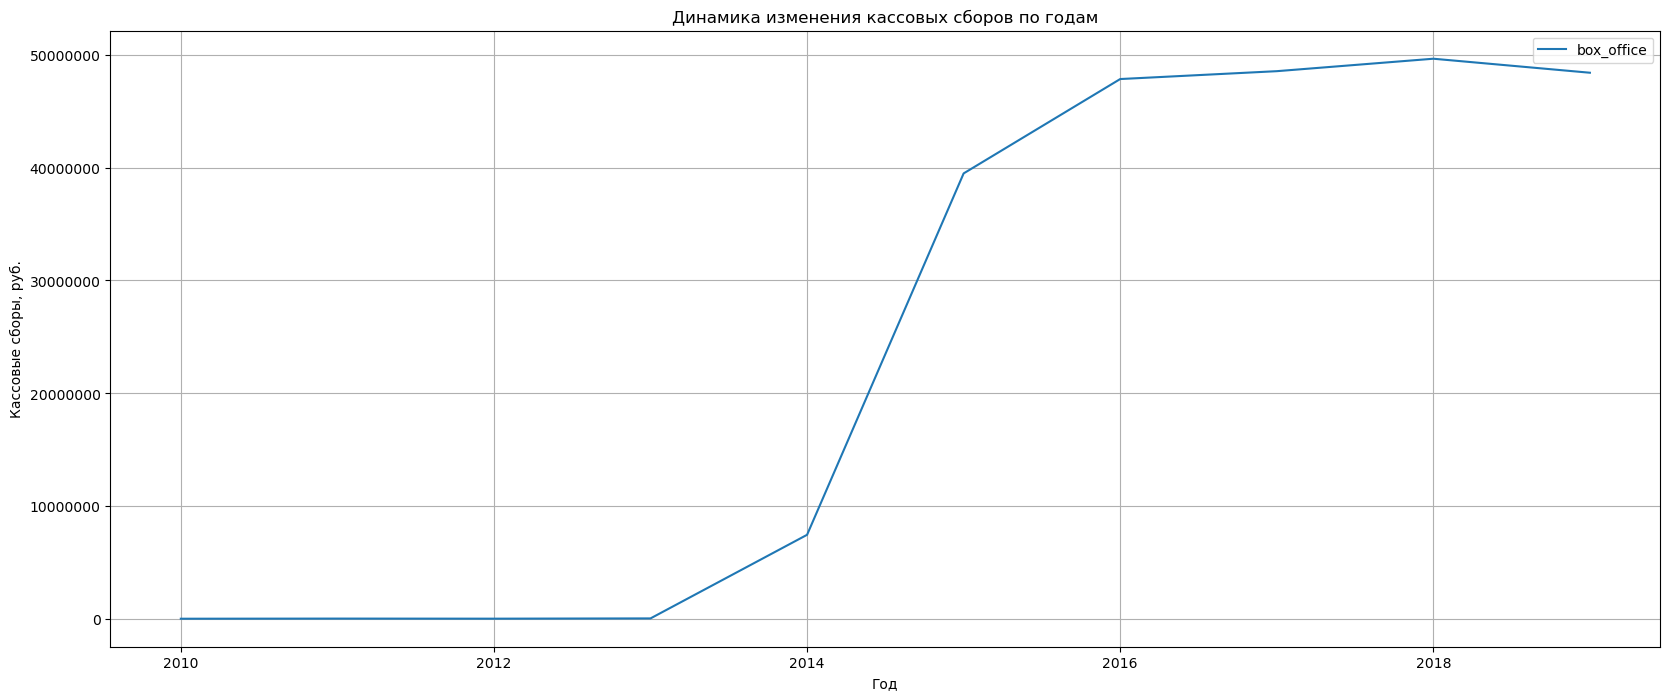

In [137]:
data.pivot_table(index='show_year', values='box_office', aggfunc='sum').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Кассовые сборы, руб.')
plt.xlabel('Год')
plt.title('Динамика изменения кассовых сборов по годам')
plt.ticklabel_format(style='plain')
plt.show()

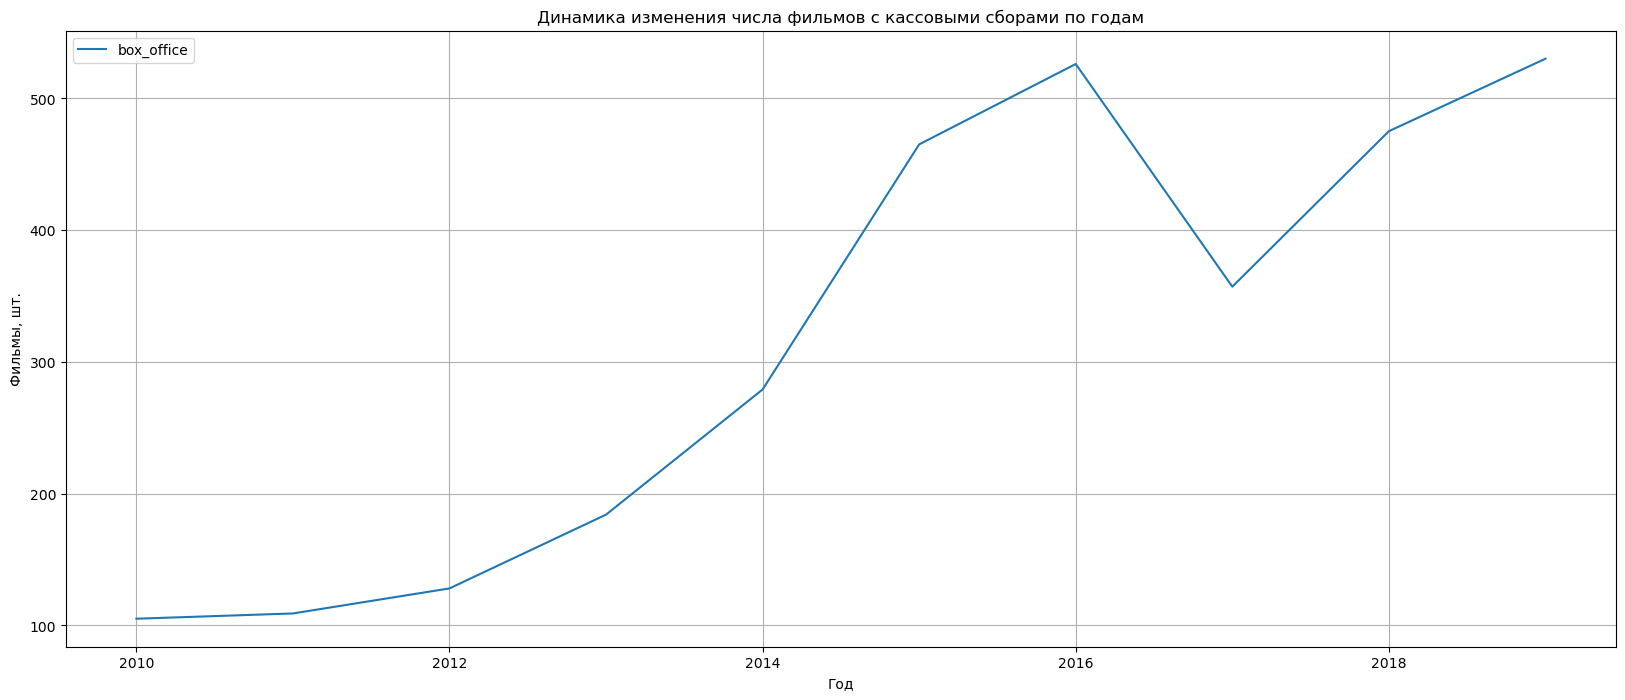

In [138]:
data.pivot_table(index='show_year', values='box_office', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Фильмы, шт.')
plt.xlabel('Год')
plt.title('Динамика изменения числа фильмов с кассовыми сборами по годам')
plt.show()

In [77]:
box_office_pivot=data.pivot_table(index='show_year', values='box_office', aggfunc={'sum', 'count'})
box_office_pivot.sort_values('sum', ascending=False).round(2).reset_index()

,show_year,count,sum
0,2018,475,49668403.13
1,2017,357,48563707.22
2,2019,530,48425708.78
3,2016,526,47866299.74
4,2015,465,39497365.20
5,2014,279,7444951.86
6,2013,184,29799.71
7,2011,109,14102.76
8,2012,128,6955.42
9,2010,105,2428.65


И график и сводная таблица показывают весьма интересные данные. С 2013 года начался резкий рост сборов. При этом, стоит отметить, что сам проект ЕАИС, который создан для учета данных о прокате фильмов в России, активно начал развиваться под управлением Фонда Кино с 2014 года, о чем свидетельствует информация на официальном сайте https://ekinobilet.fond-kino.ru/about/history/. 

То есть, фактически, период с 2010 по 2013 год, скорее всего, был "тестовым" для системы. И, начиная с 2014 года, по мере роста охвата кинотеатров ЕАИС, данные начали учитываться более полно.

Это же подтверждается и динамикой изменения количества фильмов, по которым известны данные о сборах.

При этом минимальное значение сборов было в 2010 году, а максимальное в 2018. Однако, есть вероятность, что за 2019 год нет финальных данных, либо они недостаточно собраны, если срез данных был сделан не по полному году.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [78]:
box_office_pivot_2=data.pivot_table(index='show_year', values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
box_office_pivot_2.sort_values('count', ascending=False).round(2).reset_index()

,show_year,count,mean,median,sum
0,2019,530,91369.26,4627.80,48425708.78
1,2016,526,91000.57,3846.68,47866299.74
2,2018,475,104565.06,8891.10,49668403.13
3,2015,465,84940.57,4920.93,39497365.20
4,2017,357,136032.79,9968.34,48563707.22
5,2014,279,26684.42,18.16,7444951.86
6,2013,184,161.95,3.52,29799.71
7,2012,128,54.34,5.66,6955.42
8,2011,109,129.38,3.00,14102.76
9,2010,105,23.13,1.70,2428.65


По второй сводной таблице с медианным и средним значением сборов по годам, можно наблюдать интересные вещи.

Лидеры по средним и медианным сборам оказываются 2017 и 2018 года, при том, что фильмов тогда вышло в прокат меньше, чем в 2019 году. Однако, общая сумма сборов в упомянутые три года практически одинакова. Но в 2019 году вышло больше фильмов, чем в 2017 и 2018 годах. Возможно, это связано с тем, что вышедшие фильмы меньше окупаются, либо снижается стоимость билетов на них в кинотеатрах. Также возможным фактором, влияющим на итоговые сборы, может являться и количество кинотеатров, в которых фильмы демонстрируются.

Кроме этого, еще одним фактором, не учитывающимся в таблице, может быть и переход зрителя в онлайн-сервисы и просмотр фильмов на стриминговых платформах по подписке, где цена ниже, а выбор фильмов выше. Данную закономерность можно было бы исследовать, если бы можно было добавить данные о количестве просмотров фильмов в кинотеатрах и на платформах, а также количество денег, собранное фильмами, которые покупаются пользователями в подобных сервисах.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

In [79]:
pivot_2015_2019 = data.query('show_year >= 2015')
age_pivot = pivot_2015_2019.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
age_pivot.sort_values('sum', ascending=False).round(2).reset_index()

,show_year,age_restriction,count,mean,median,sum
0,2017,«16+» - для детей старше 16 лет,121,154917.71,9702.08,18745042.90
1,2016,«16+» - для детей старше 16 лет,182,91563.45,5133.02,16664548.54
2,2018,«16+» - для детей старше 16 лет,156,105792.32,9010.64,16503602.35
3,2018,«12+» - для детей старше 12 лет,67,212944.65,8931.97,14267291.66
4,2015,«12+» - для детей старше 12 лет,73,186521.67,15351.56,13616082.01
5,2019,«6+» - для детей старше 6 лет,81,158673.44,12875.35,12852548.65
6,2019,«16+» - для детей старше 16 лет,178,71648.42,3210.72,12753418.98
7,2019,«12+» - для детей старше 12 лет,85,149178.81,3405.55,12680198.77
8,2016,«12+» - для детей старше 12 лет,82,148834.71,4690.64,12204446.52
9,2017,«6+» - для детей старше 6 лет,45,268580.94,51992.10,12086142.15


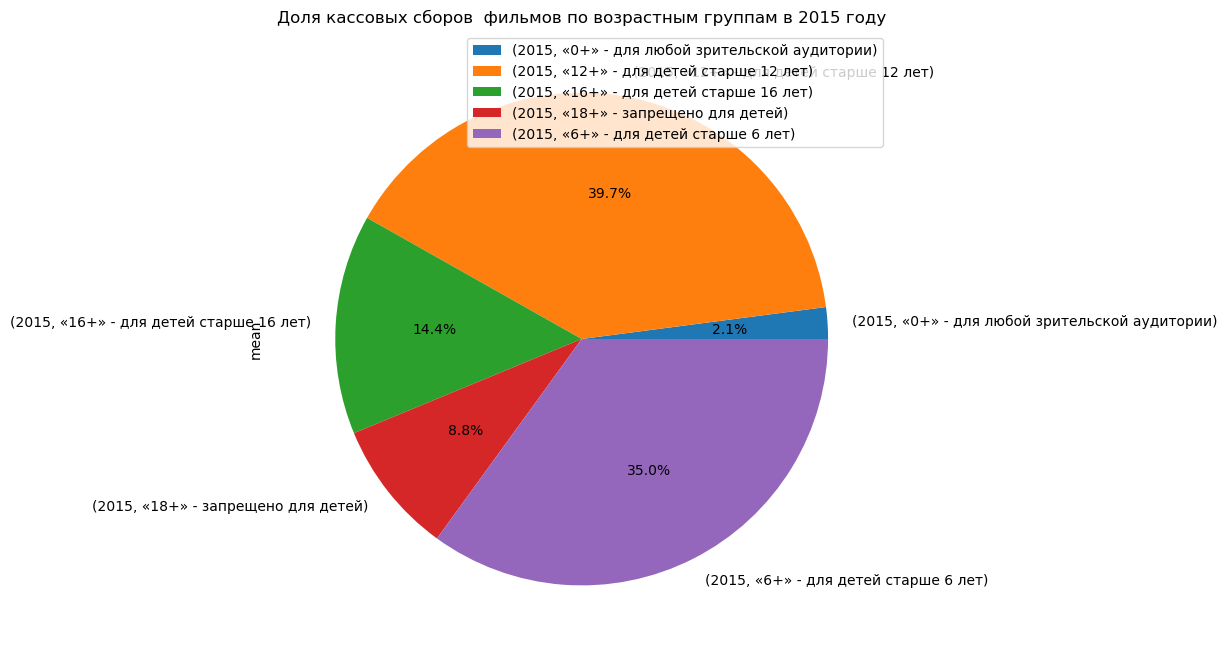

In [151]:
age_2015 = pivot_2015_2019.query('show_year == 2015')
age_2015.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'}).plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов  фильмов по возрастным группам в 2015 году')
plt.show()

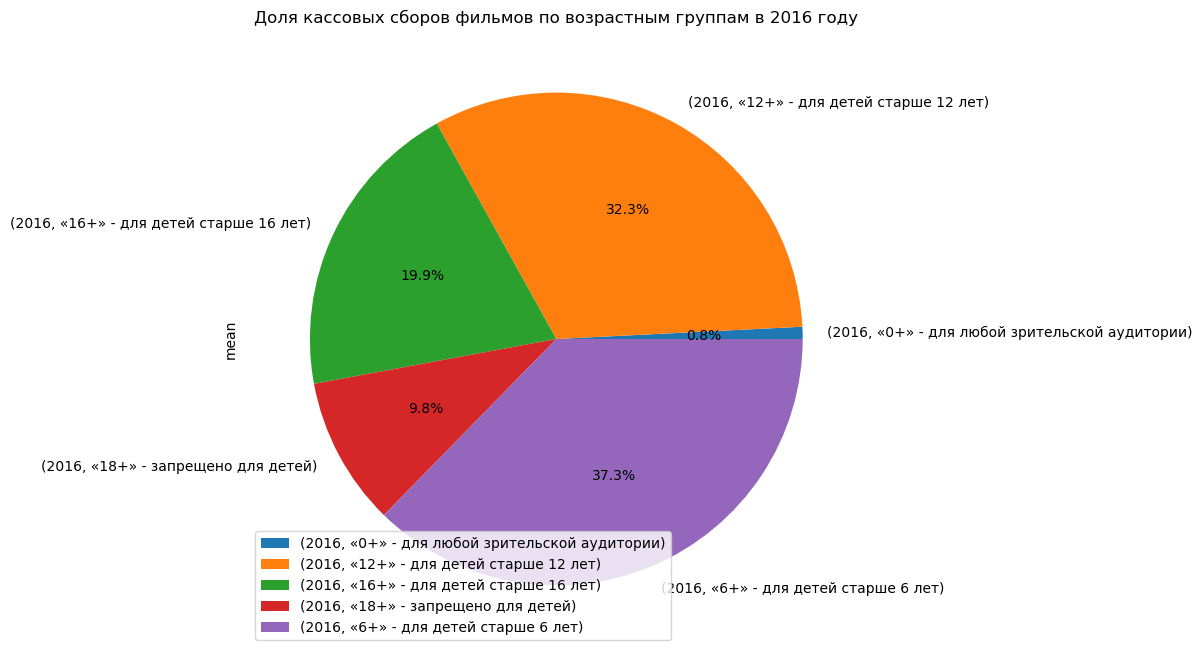

In [150]:
age_2016 = pivot_2015_2019.query('show_year == 2016')
age_2016.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'}).plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов фильмов по возрастным группам в 2016 году')
plt.show()

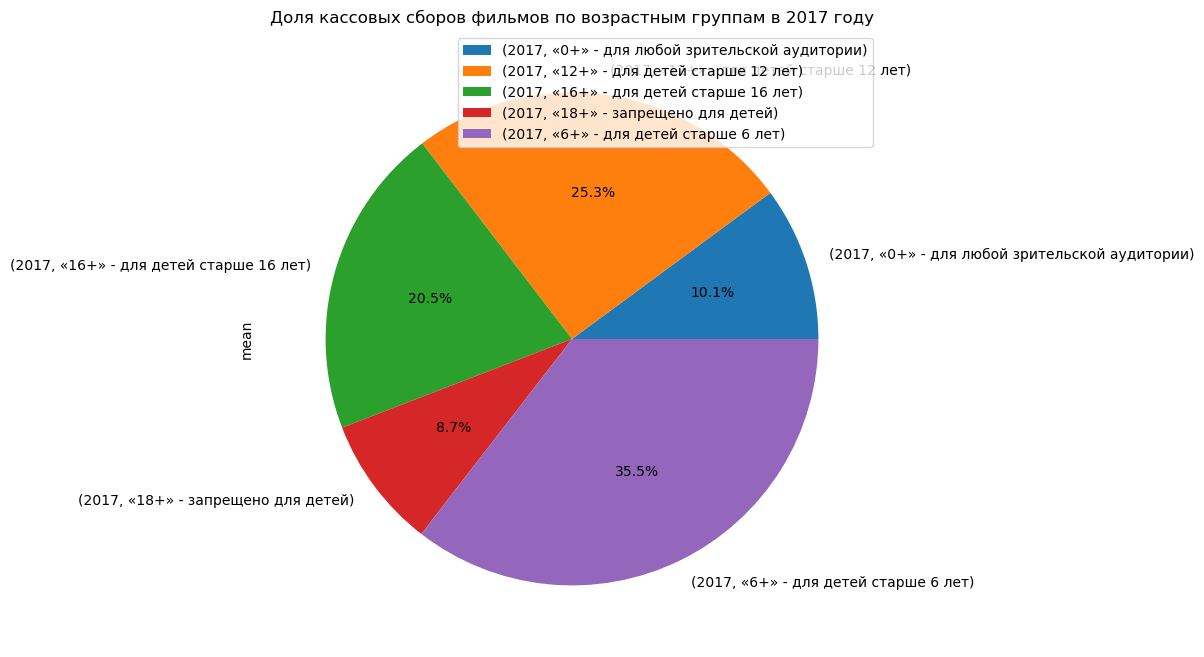

In [149]:
age_2017 = pivot_2015_2019.query('show_year == 2017')
age_2017.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'}).plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов фильмов по возрастным группам в 2017 году')
plt.show()

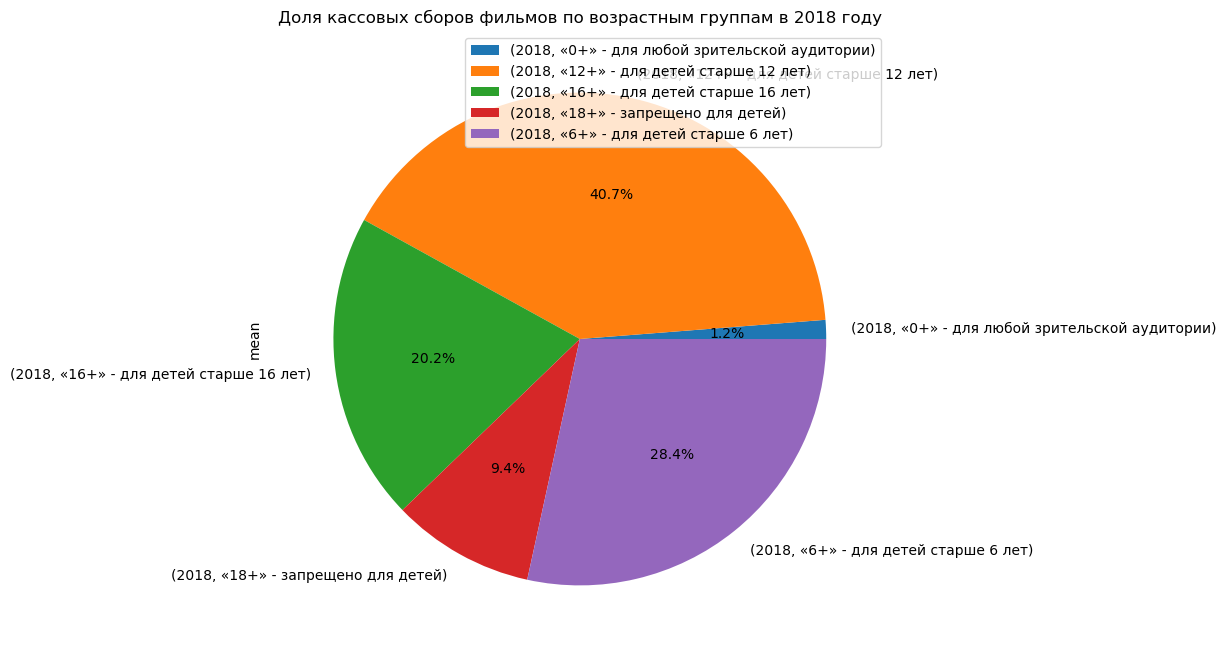

In [148]:
age_2018 = pivot_2015_2019.query('show_year == 2018')
age_2018.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'}).plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов фильмов по возрастным группам в 2018 году')
plt.show()

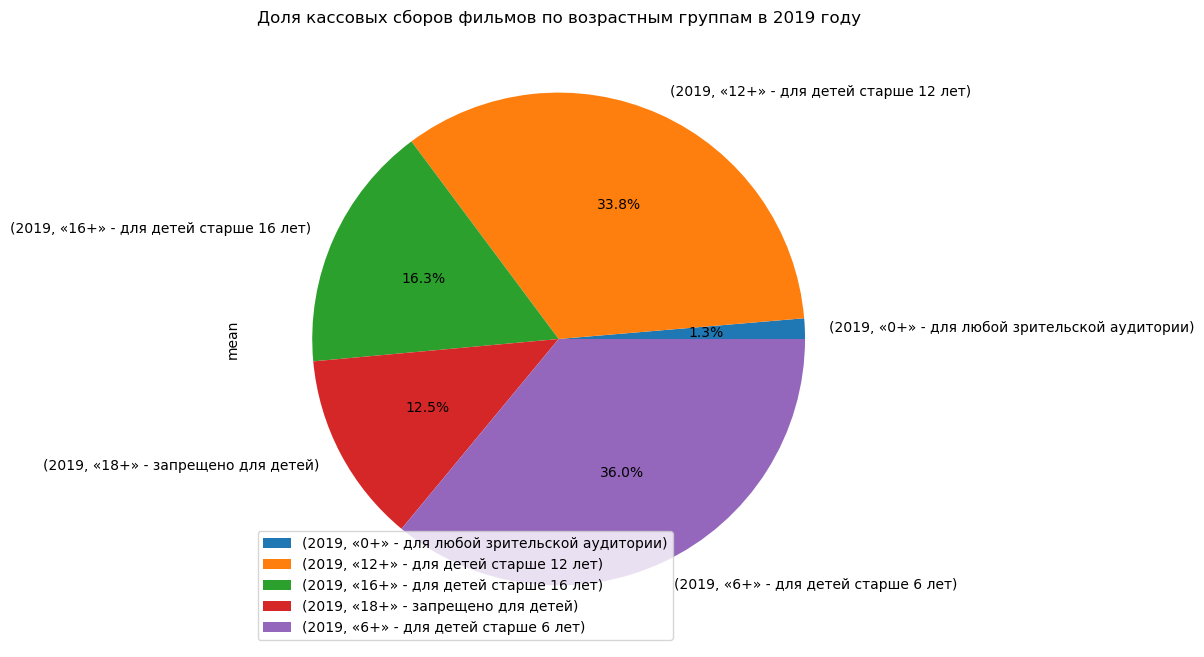

In [147]:
age_2019 = pivot_2015_2019.query('show_year == 2019')
age_2019.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'}).plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов фильмов по возрастным группам в 2019 году')
plt.show()

In [85]:
age_pivot_2 = pivot_2015_2019.pivot_table(index='age_restriction',values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
age_pivot_2.sort_values('sum', ascending=False).round(2).reset_index()

,age_restriction,count,mean,median,sum
0,«16+» - для детей старше 16 лет,805,94453.09,5600.01,76034733.64
1,«12+» - для детей старше 12 лет,348,174193.81,5065.04,60619446.63
2,«6+» - для детей старше 6 лет,317,176020.85,13736.21,55798610.80
3,«18+» - запрещено для детей,792,51464.16,6154.44,40759615.57
4,«0+» - для любой зрительской аудитории,91,8890.96,2943.32,809077.43


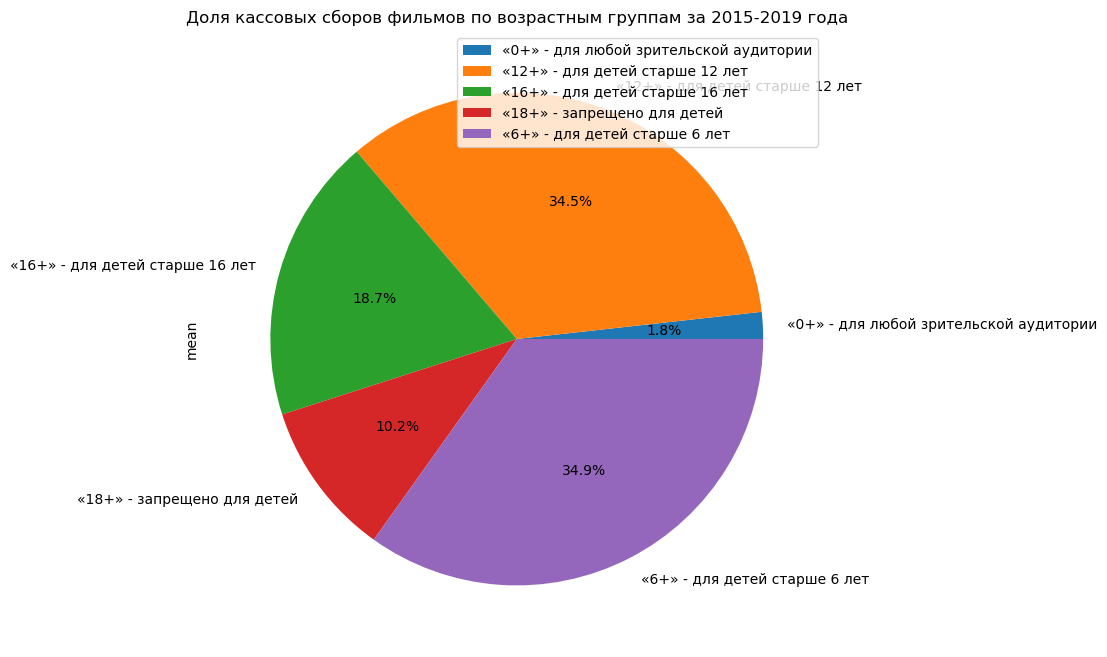

In [146]:
age_pivot_2.plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов фильмов по возрастным группам за 2015-2019 года')
plt.show()

Интересно обратить внимание, что фильмы с рейтингом 0+ собрали меньше всех денег, причем среди них максимальные сборы были в 2015 и 2017 году. Возможно в этих годах появлялись какие-либо мультфильмы или сказки, которые подходят под критерии "для любой зрительской аудитории". Однако таких фильмов за всё время исследований оказалось всего 91.

Если же посмотреть более укрупненно на сборы по возрастным ограничениям, то можно заметить, что фильмы 6+ имеют максимальный средний сбор. Это может быть обусловлено тем, что в этой категории достаточно много популярных мультфильмов и семейных фильмов. Для этой категории самым успешным по общей сумме сборов оказался 2019 год, причем таких фильмов и вышло больше всего в 2019 году. В части же средних и медианных сборов по этой категории, самым успешным был 2017 год. Если посмотреть, какие мультфильмы выходили в 2017 году - такой результат вполне очевиден.

Интересно заметить, что верхнюю планку по средним сборам держат фильмы 6+ и 12+. Это в принципе неудивительно, поскольку в этой категории очень много фильмов для всей семьи, и в кино очень часто ходят родители с детьми. В том числе и ЦА подобных фильмов - дети, которые часто идут в кино с родителями. А значит, что и в среднем такой фильм будет приносить больше денег. По годам, фильмы 12+ продемонстрировали лучшие показатели в 2018 и 2019 годах. С учетом факта увеличения количества фильмов от года к году, и уже изучавшегося распределения фильмов по годам, такое поведение данных неудивительно.

Фильмы 16+ занимают верхнюю строчку по количеству выходивших с 2015 года, и в 2016, 2017 и 2018 годах эти фильмы собрали больше всех денег в прокате. И в общем выражении этих фильмов вышло больше, чем фильмов предыдущих трех категорий вместе взятых. Однако в части общих сборов, отрыв от фильмов 6+ и 12+ минимален. Средние же сборы по яильмам 16+ значительно меньше, чем у 6+. Это может быть обусловлено тем, что дети старшего возраста уже сами могут ходить в кино без родителей, что соответствующе влияет на сборы.

А вот с фильмами 18+ наблюдается весьма интересная ситуация. Их вышло примерно столько же, сколько фильмов 16+, но общие сборы по ним значительно меньше предыдущей категории. Самые большие сборы же по ним наблюдались в 2019 году. Следом в этой категории идут 2017 и 2018 годы, и вполне видна тенденция к росту количества фильмов и сборов в этой категории.

**Вывод**

Самыми прибыльными картинами являются картины для детей младшего и среднего возраста. Как правило, на них дети идут с родителями, и тем самым денег они собирают больше, добавляя к желающему их смотреть зрителю также и одного или двух дополнительных. Фильмы 16+ уже начинают брать количеством картин, поскольку количество зрителей уменьшается по описанным ранее причинам.

Фильмы 0+ и  18+ становятся уже фильмами "на любителя", поскольку ориентированы либо на взрослых людей, которые сейчас с б*о*льшей охотой посмотрят фильм дома (что повлечет падение сборов), либо на всю семью, в том числе и самых маленьких зрителей. Но в обоих случаях есть свои особенности, связанные со средним портретом зрителя.

Если дополнить данные количеством проданных билетов, то можно будет сложить более полную картину об успешности тех или иных типов картин. Скорее всего, гипотеза о том, что фильмы для детей 6+ и 12+ приносят больше всего денег за счет того, что их смотрят дети вместе с родителями, подтвердится.

### Исследование фильмов с государственной поддержкой

Для начала выделим в отдельный датафрейм фильмы с господдержкой и известными бюджетами, чтобы оперировать с более коротким набором данных.

In [87]:
rus_film = data.query('budget > 0')
rus_film.head(10)

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,state_support
1281,1281,Пока еще жива,111005313.00,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,...,26500.00,79411.90,Министерство культуры,8.10,"драма,мелодрама",365.35,2013,драма,А.Атанесян,0.33
1448,1448,Бесславные придурки,111003314.00,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,...,26000.00,37142.86,Министерство культуры,NaN,NaN,28.14,2014,None,А.Якимчук,0.70
1498,1498,Невидимки,111004213.00,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,...,107847.95,176023.49,Фонд кино,5.30,"комедия,фантастика",19957.03,2013,комедия,Р.Давлетьяров,0.61
1524,1524,БЕРЦЫ,111004314.00,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,...,28000.00,40574.14,Министерство культуры,4.20,драма,55.92,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69
1792,1792,Братья Ч,111004414.00,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,...,25000.00,40015.12,Министерство культуры,6.40,драма,232.10,2014,драма,М.Угаров,0.62
1853,1854,Тайна Сухаревой башни. Чародей равновесия,114000115.00,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,...,25000.00,51850.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078.86,2015,мультфильм,С.Серегин,0.48
1869,1870,А зори здесь тихие...,111002915.00,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,...,100000.00,220588.39,Фонд кино,8.50,"драма,военный,история",249166.77,2015,драма,Р.Давлетьяров,0.68
1870,1871,Две женщины,111013714.00,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,...,46502.30,86210.07,"Министерство культуры, Фонд кино",6.70,драма,4731.24,2014,драма,В.Глаголева,0.54
1902,1903,Призрак.,111001815.00,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,...,75000.00,139551.50,Фонд кино,7.00,"триллер,боевик,приключения",352804.32,2015,триллер,А.Войтинский,0.54
1911,1912,Ведьма .,111002215.00,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,...,34000.00,48571.43,Министерство культуры,7.40,"фэнтези,приключения,драма",51.91,2015,фэнтези,Д.Федоров,0.70


Для начала исследуем окупаемость фильмов, для этого добавим еще один столбец, в котором будет два значения, "окупился" и "не окупился" в зависимости от сборов и общего бюджета.

In [88]:
def yspex (row):
    budg = row['budget']
    box_o = row['box_office']
    if box_o >= budg:
        return 'окупился'
    else:
        return 'не окупился'
    
rus_film['success'] = rus_film.apply(yspex, axis=1)
rus_film.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13632\2637787695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_film['success'] = rus_film.apply(yspex, axis=1)


,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,state_support,success
1281,1281,Пока еще жива,111005313.00,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,...,79411.90,Министерство культуры,8.10,"драма,мелодрама",365.35,2013,драма,А.Атанесян,0.33,не окупился
1448,1448,Бесславные придурки,111003314.00,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,...,37142.86,Министерство культуры,NaN,NaN,28.14,2014,None,А.Якимчук,0.70,не окупился
1498,1498,Невидимки,111004213.00,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,...,176023.49,Фонд кино,5.30,"комедия,фантастика",19957.03,2013,комедия,Р.Давлетьяров,0.61,не окупился
1524,1524,БЕРЦЫ,111004314.00,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,...,40574.14,Министерство культуры,4.20,драма,55.92,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69,не окупился
1792,1792,Братья Ч,111004414.00,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,...,40015.12,Министерство культуры,6.40,драма,232.10,2014,драма,М.Угаров,0.62,не окупился


In [89]:
rus_film['success'].value_counts()

не окупился    253
окупился        79
Name: success, dtype: int64

In [90]:
rus_film.pivot_table(index='show_year',values='success', aggfunc='count')

,success
show_year,
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56
2019,70


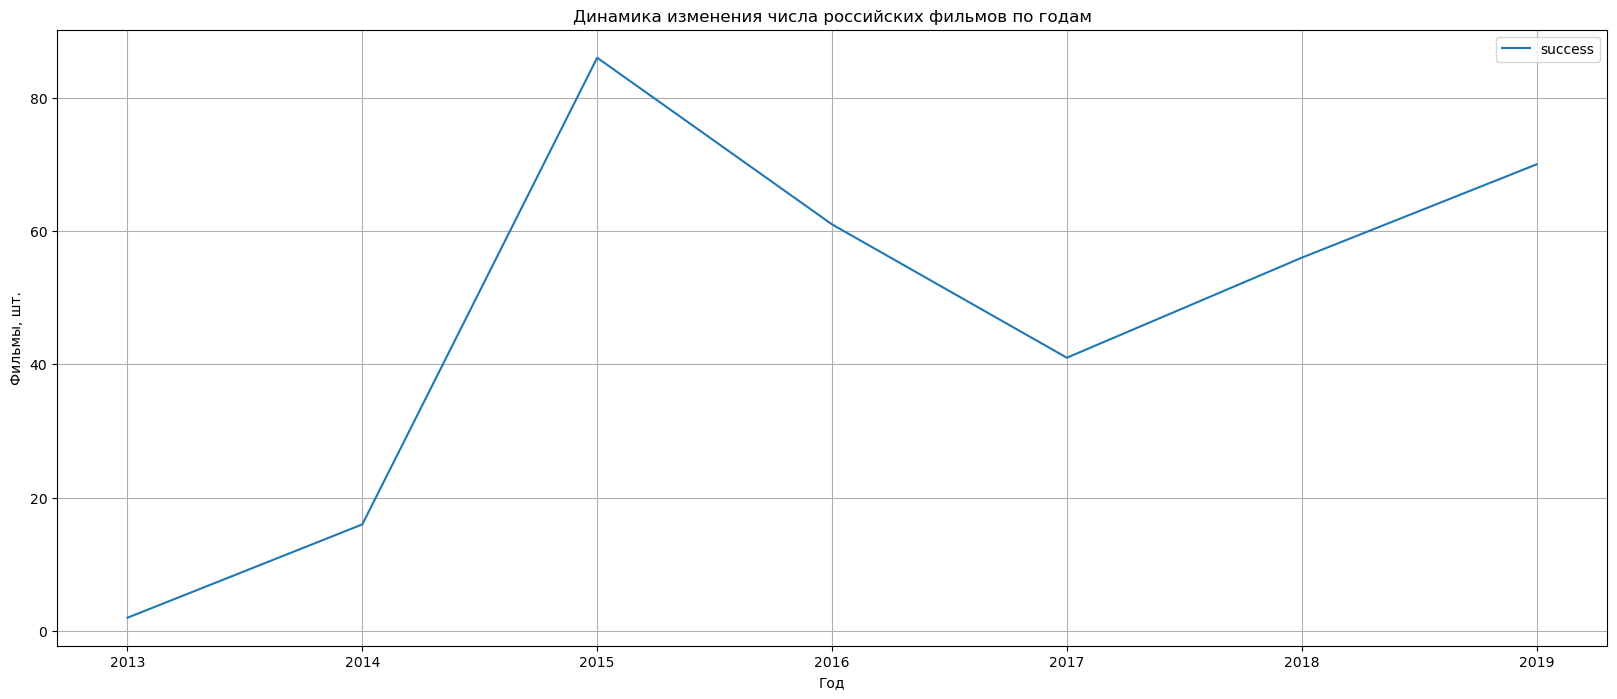

In [153]:
rus_film.pivot_table(index='show_year',values='success', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Фильмы, шт.')
plt.xlabel('Год')
plt.title('Динамика изменения числа российских фильмов по годам')
plt.show()

Прискорбная ситуация, что из 332 фильмов, получивших господдержку, окупились только 79.

Можно рассмотреть, как распределяется по годам окупаемость фильмов. Если от года к году она увеличивается - значит не всё еще плохо, и возможно у БэдКомедиана в будущем будет меньше обзоров не сильно качественных отечественных фильмов. Также будет интересно рассмотреть значения выделяемых возвратных и невозвратных средств от года к году, а также в рамках окупившихся и неокупившихся фильмов.

#### Исследование окупившихся российских фильмов

In [92]:
success = rus_film.query('success == "окупился"')
success['show_year'].value_counts()

2018    20
2015    18
2017    15
2016    12
2019    11
2014     3
Name: show_year, dtype: int64

*Интересно что в 2013 году не окупился ни один фильм. Правда и данные о поддержке и сборах есть только у двух фильмов за тот период. Но тем не менее результат в 100% неудачи в первый год - плохой знак.*

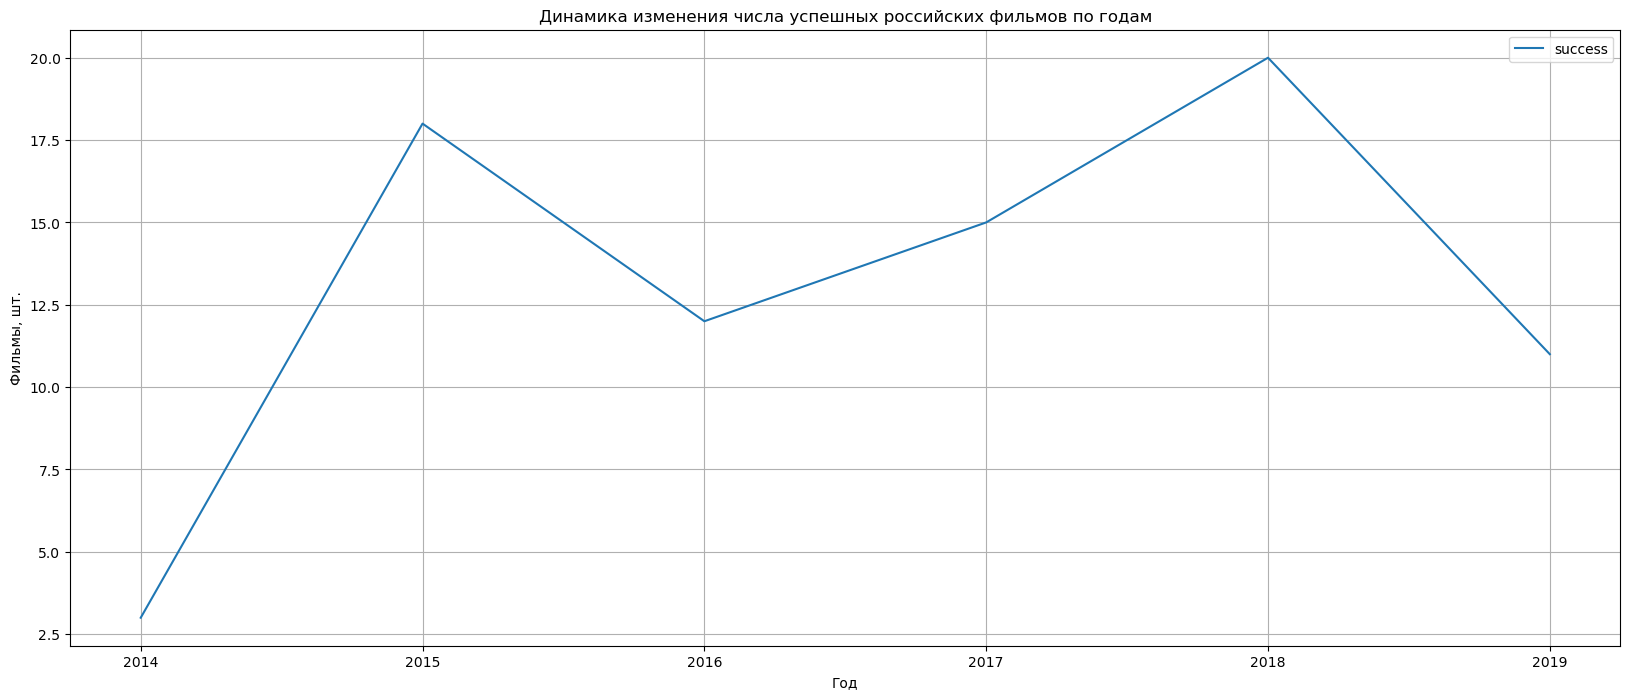

In [154]:
success.pivot_table(index='show_year',values='success', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Фильмы, шт.')
plt.xlabel('Год')
plt.title('Динамика изменения числа успешных российских фильмов по годам')
plt.show()

In [161]:
success_ratio = success.pivot_table(index='show_year',values='success', aggfunc='count').reset_index()
success_ratio ['total_film'] = [16,86,61,41,56,70]
success_ratio['ratio'] = success_ratio['success'] / success_ratio ['total_film'] *100
success_ratio

,show_year,success,total_film,ratio
0,2014,3,16,18.75
1,2015,18,86,20.93
2,2016,12,61,19.67
3,2017,15,41,36.59
4,2018,20,56,35.71
5,2019,11,70,15.71


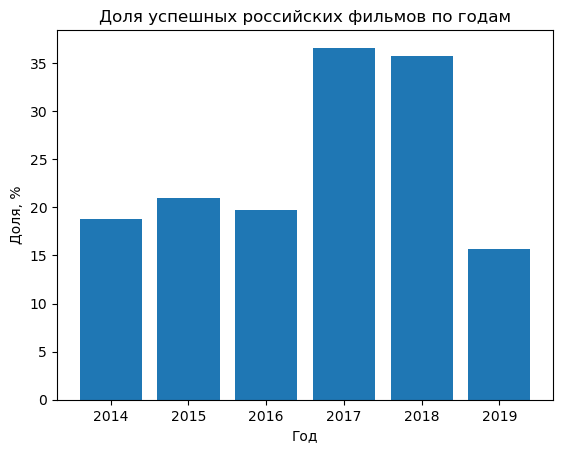

In [159]:
plt.bar(x=success_ratio['show_year'],height=success_ratio['ratio'])
plt.ylabel('Доля, %')
plt.xlabel('Год')
plt.title('Доля успешных российских фильмов по годам')
plt.show()

График окупаемости весьма интересен тем, что при первом малом пике успешности фильмов в 2015м году последовал провал в 2016м, но далее ситуация начала исправляться, достигнув максимума в 2018 году. За 2019й год, скорее всего, есть только неполные данные, как мы уже предполагали выше, поэтому делать выводы по нему пока еще рано. Однако, с 2016 года определенно есть положительная тенденция к росту успешности фильмов.

*Возвращаясь к данным за 2019 год, с одной стороны можно предположить, что еще не совсем полны данные по сборам, по количеству фильмов и поддержке, но общая доля успешных фильмов на 20% ниже - это тоже показатель.*

*В целом, по диаграмме видно, что наиболее успешными для российского кинематографа с господдержкой были 2017 и 2018 годы, на которые пришлись почти 50% всех успешных отечественных фильмов, получивших поддержку и окупившихся в прокате.*

Небезынтересным будет также изучить рейтинг окупившихся фильмов от года к году.

In [160]:
success.pivot_table(index='show_year',values='ratings', aggfunc={'median', 'mean'}).reset_index()

,show_year,mean,median
0,2014,5.83,6.00
1,2015,6.34,6.25
2,2016,5.79,5.70
3,2017,5.97,6.00
4,2018,5.84,6.10
5,2019,6.44,6.70


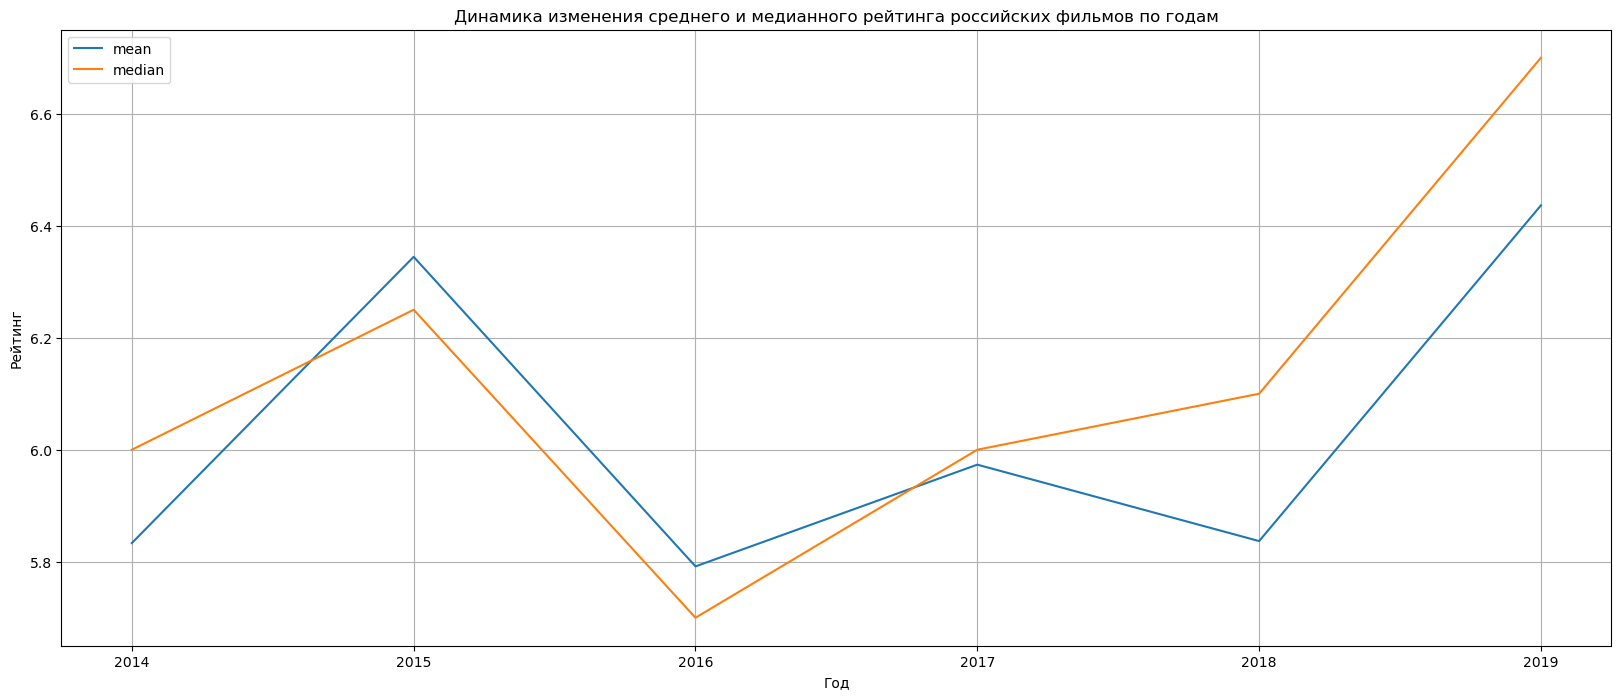

In [163]:
success.pivot_table(index='show_year',values='ratings',aggfunc={'median', 'mean'}).plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Рейтинг')
plt.xlabel('Год')
plt.title('Динамика изменения среднего и медианного рейтинга российских фильмов по годам')
plt.show()

А вот с рейтингами у окупившихся фильмов не сильно хорошо: средний и медианный рейтинг не превышает 7.0, но имеет тенденцию к росту. При этом, если сравнить графики изменения рейтинга и количества окупившихся фильмов, то можно увидеть, что на первой половине периода они повторяют общий тренд, а далее медианный рейтинг начинает расти.

Теперь посмотрим на выделявшееся финансирование на успешные фильмы.

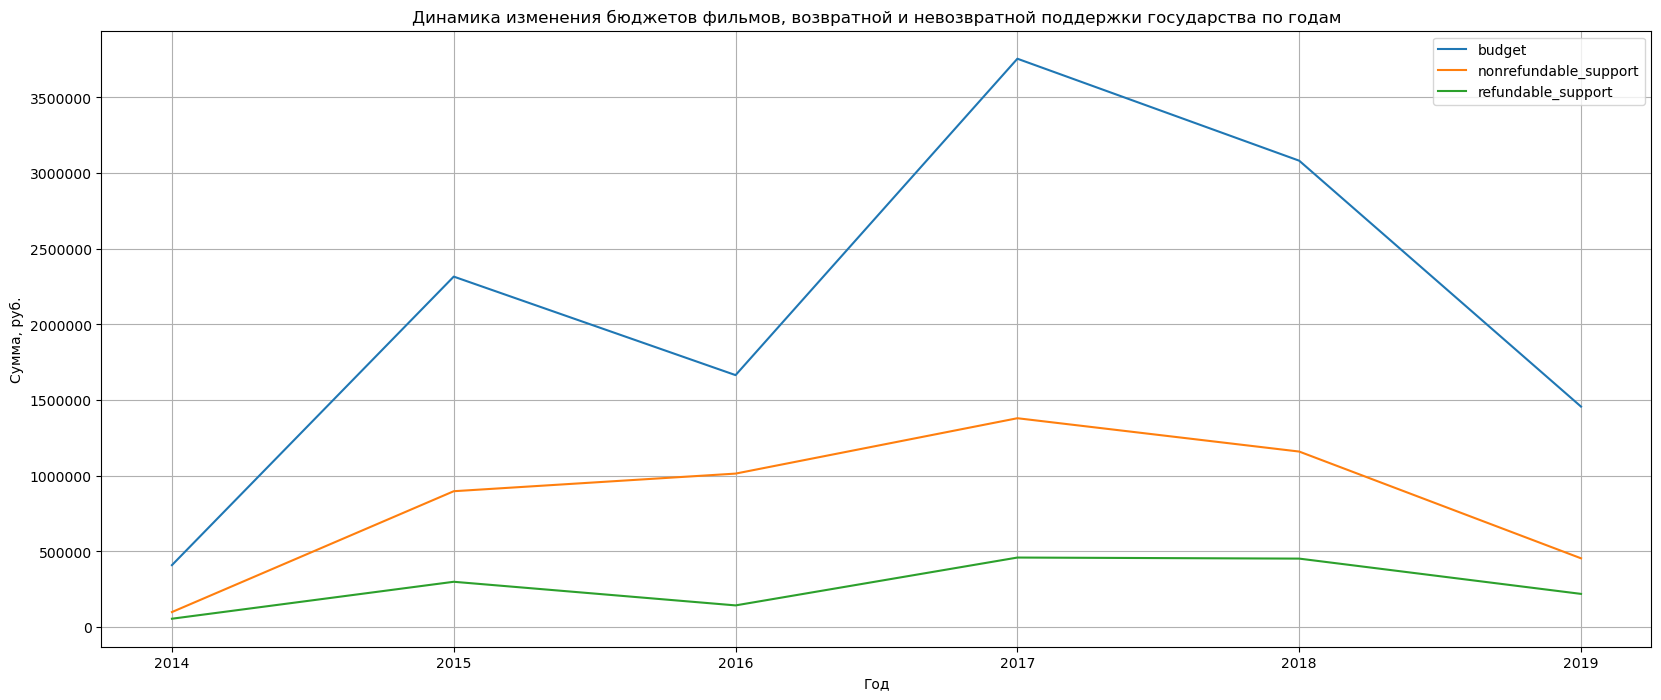

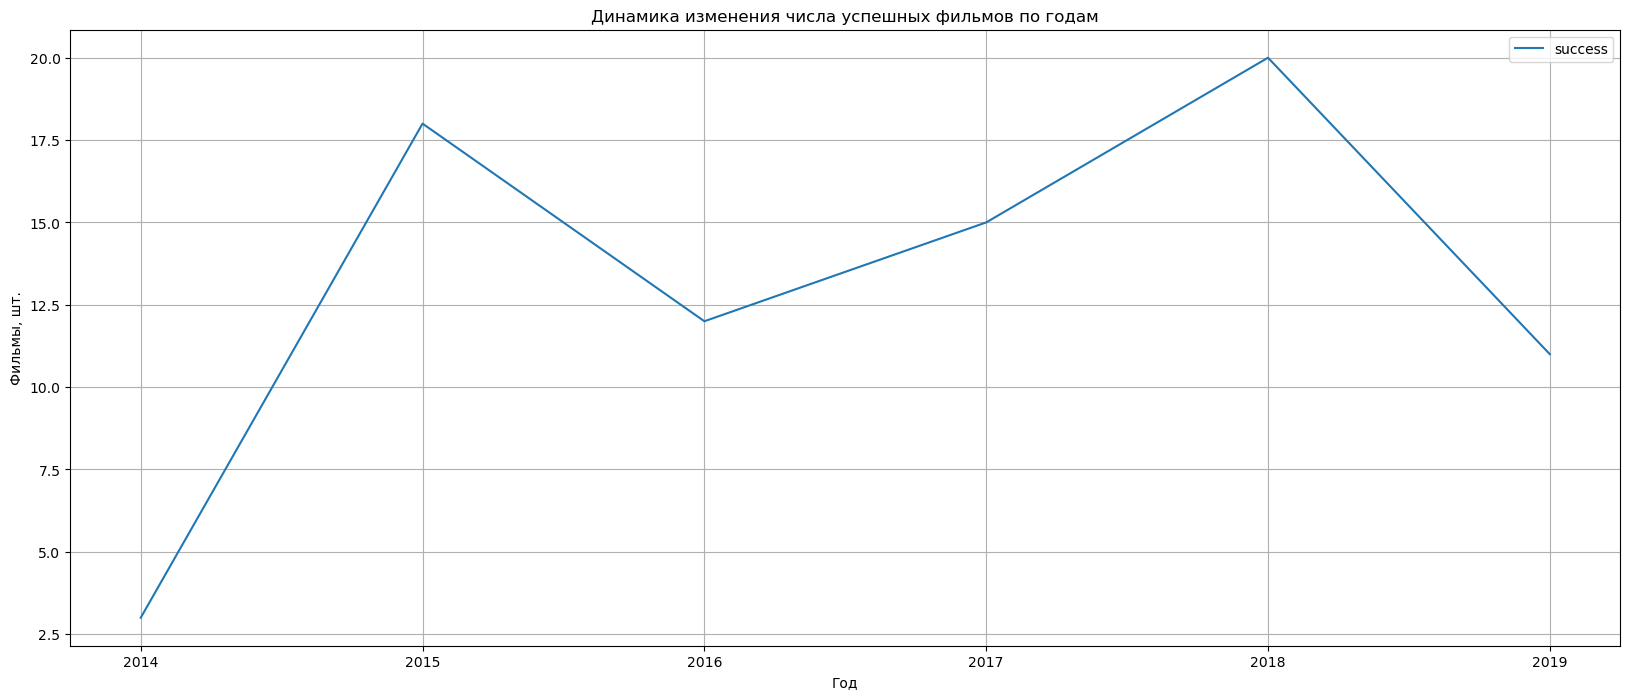

In [170]:
success.pivot_table(index='show_year',values=['budget', 'refundable_support', 'nonrefundable_support'], aggfunc='sum').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Сумма, руб.')
plt.xlabel('Год')
plt.title('Динамика изменения бюджетов фильмов, возвратной и невозвратной поддержки государства по годам')
plt.ticklabel_format(style='plain')
plt.show()
success.pivot_table(index='show_year',values='success', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Фильмы, шт.')
plt.xlabel('Год')
plt.title('Динамика изменения числа успешных фильмов по годам')
plt.show()

Явно отмечается зависимость динамики успешности фильмов от выделяемых на них средств. При понимании, что выделенные средства как правило являются минимум годичными инвестициями, резкое увеличение выделяемых средств в 2017 году дало эффект в 2018 году.

В свою очередь, можно отметить, что уровень невозвратной поддержки стабильно был выше уровня возвратной, но ниже общего бюджета фильмов. Это может означать, что кроме государственного участия, бюджет кинокартин формируется также из иных источников, будь то деньги частных структур, краудфандинг и другие источники средств.

Теперь изучим уровень сборов совместно с выделявшимися бюджетами в разрезе успешных отечественных фильмов.

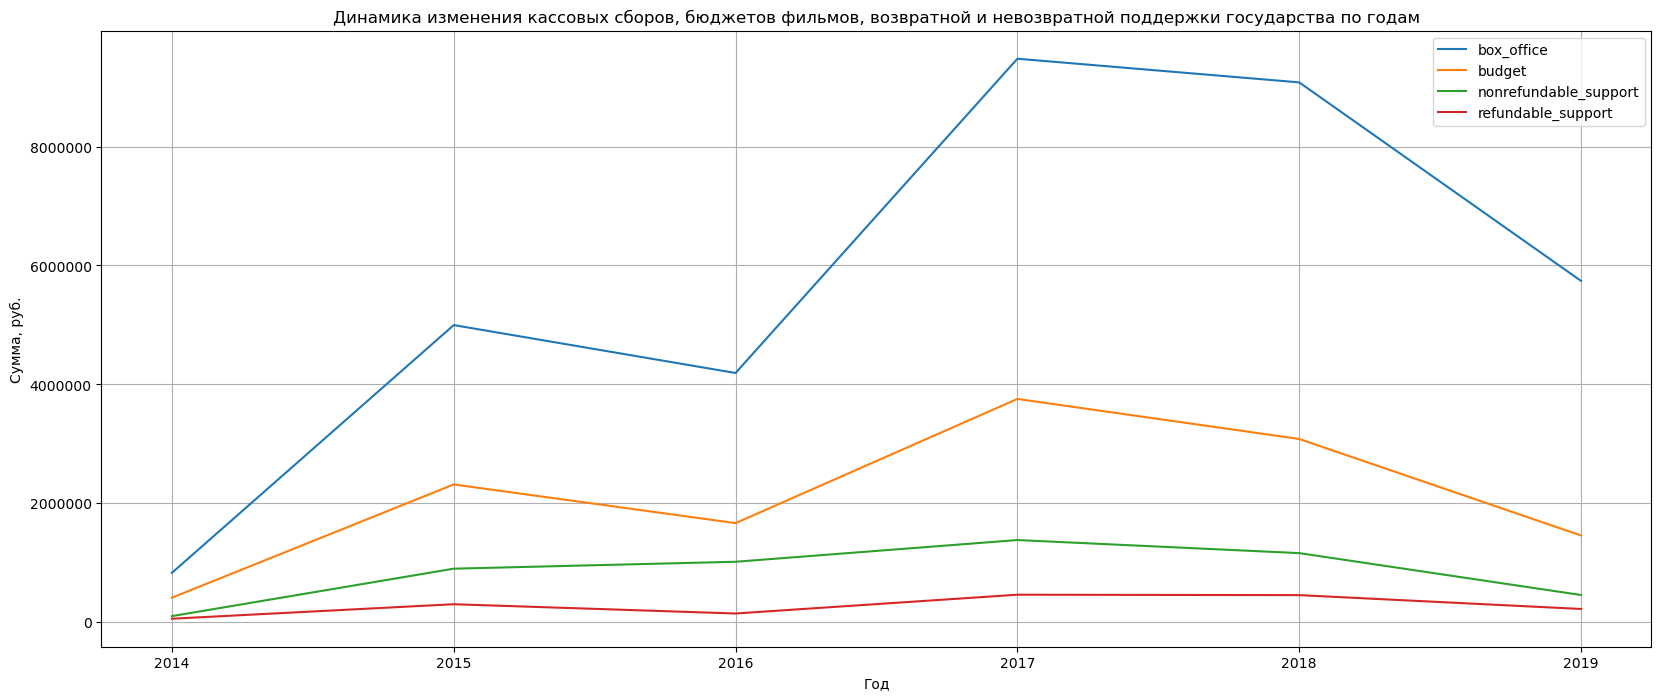

In [165]:
success.pivot_table(index='show_year',values=['budget', 'refundable_support', 'nonrefundable_support', 'box_office'], aggfunc='sum').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Сумма, руб.')
plt.xlabel('Год')
plt.title('Динамика изменения кассовых сборов, бюджетов фильмов, возвратной и невозвратной поддержки государства по годам')
plt.ticklabel_format(style='plain')
plt.show()

График кассовых сборов практически повторяет график выделявшихся бюджетов, и при этом сами сборы выше выделенных бюджетов. Как минимум, это свидетельствует о том, что окупившиеся фильмы собирают достаточную кассу для того, чтобы в будущем не прекращать поддержку индустрии, а также привлекать новых творцов с новыми идеями. 

#### Исследование неокупившихся российских фильмов

Повторим ровно те же исследования по количеству неудачных картин и изучим результаты.

In [101]:
failed = rus_film.query('success == "не окупился"')

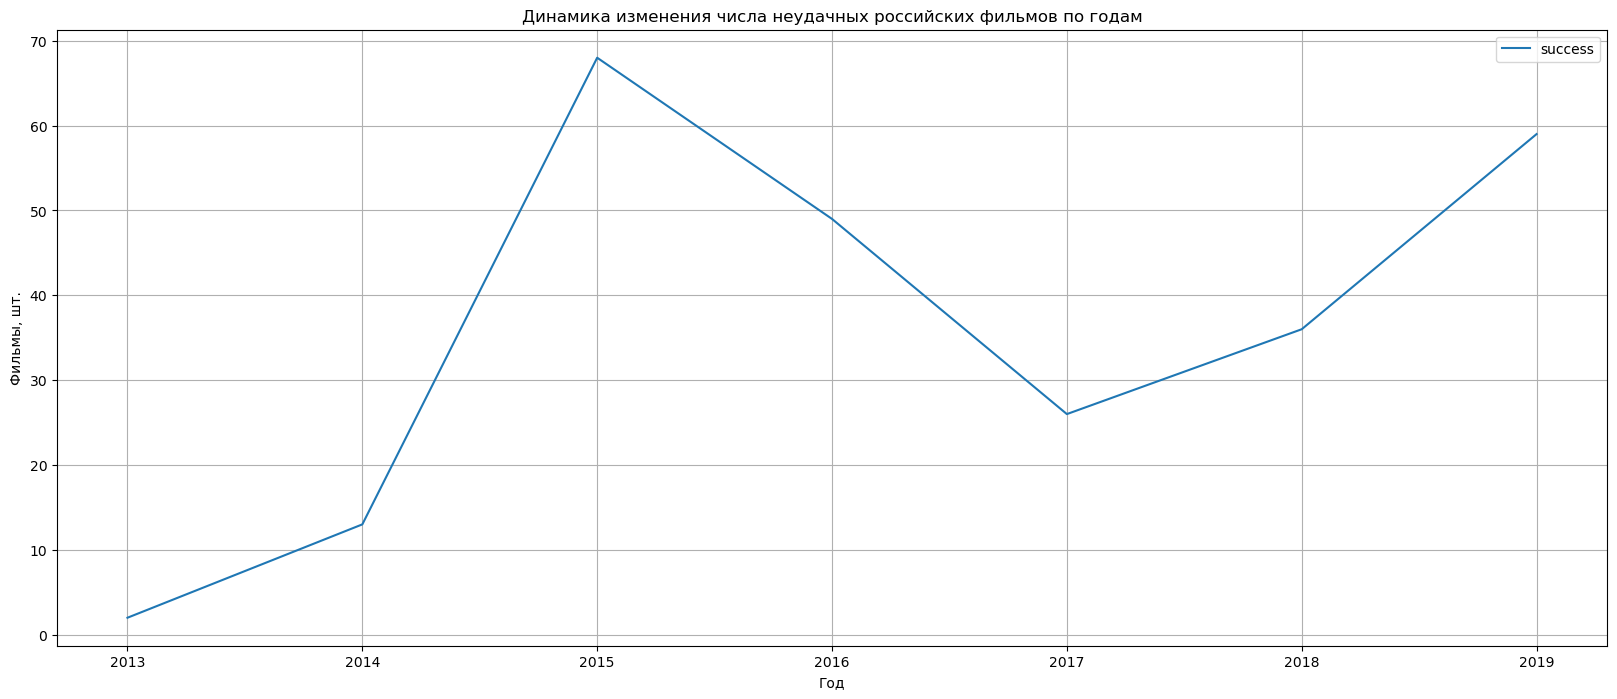

In [166]:
failed.pivot_table(index='show_year',values='success', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Фильмы, шт.')
plt.xlabel('Год')
plt.title('Динамика изменения числа неудачных российских фильмов по годам')
plt.show()

In [167]:
failed.pivot_table(index='show_year',values='success', aggfunc='count').reset_index()

,show_year,success
0,2013,2
1,2014,13
2,2015,68
3,2016,49
4,2017,26
5,2018,36
6,2019,59


2015 год - определенно "черный" год современного российского кино. И, казалось бы, ситуация начала улучшаться и провальных фильмов начало становиться меньше, но появившаяся тенденция роста их числа к 2019 году настораживает. Хочется надеяться, что это из-за неполноты данных, а не из-за того, что "пациент" неизлечим.

In [168]:
failed.pivot_table(index='show_year',values='ratings', aggfunc={'median', 'mean'}).reset_index()

,show_year,mean,median
0,2013,6.70,6.70
1,2014,6.05,6.40
2,2015,6.08,6.20
3,2016,5.65,6.00
4,2017,6.02,6.20
5,2018,6.09,6.25
6,2019,6.12,6.10


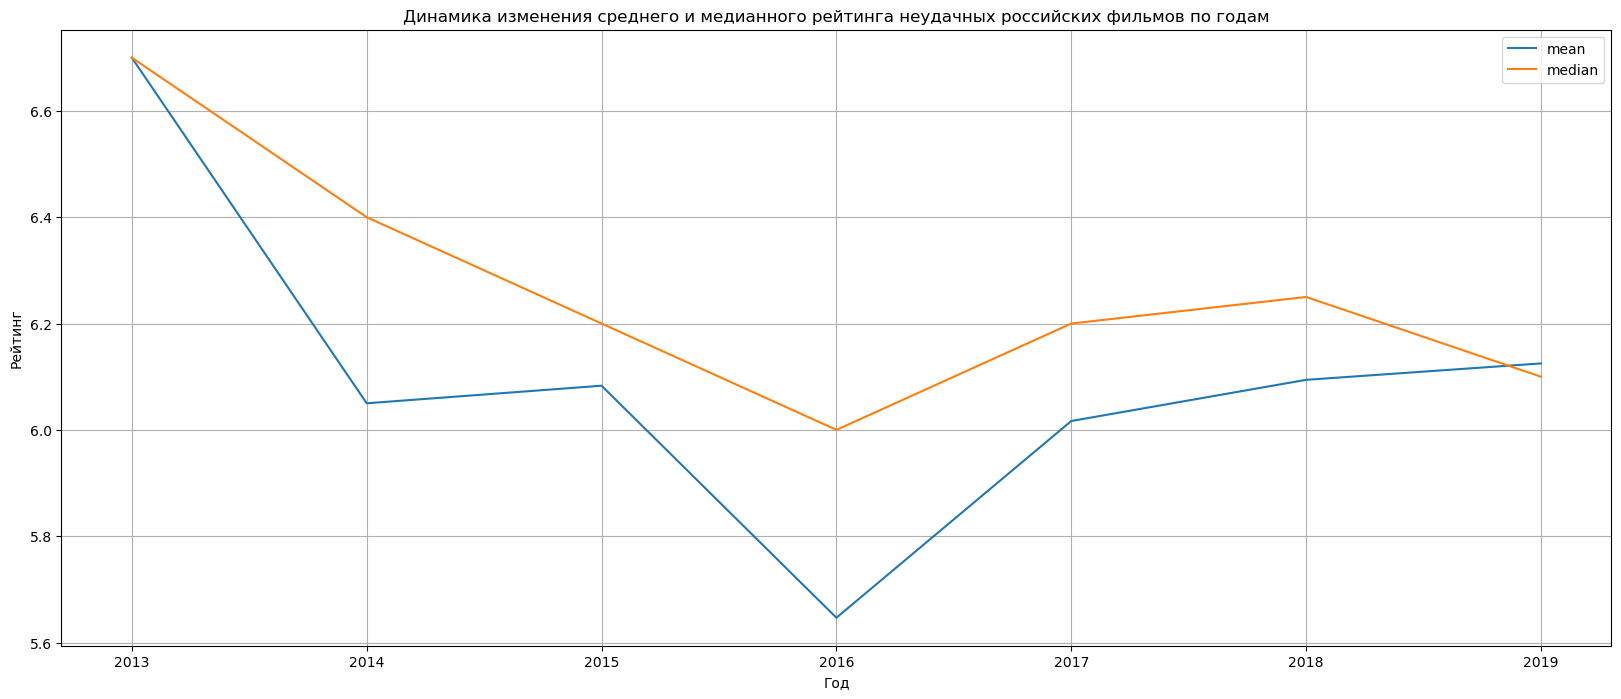

In [169]:
failed.pivot_table(index='show_year',values='ratings',aggfunc={'median', 'mean'}).plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Рейтинг')
plt.xlabel('Год')
plt.title('Динамика изменения среднего и медианного рейтинга неудачных российских фильмов по годам')
plt.show()

С одной стороны, хорошо, что рейтинги неудачных фильмов падают - как минимум это повод их создателям задуматься о верности выбранного пути.

Но с другой стороны, настораживает то, что и удачные и неудачные фильмы колеблятся в районе 6.0 по своим рейтингам. Либо у зрителя нет доверия к отечественному производителю (пользуясь случаем, передаю привет продукции Волжского автозавода), либо успешность отечественного кино далеко не в рейтингах, а в размере сборов.

В принципе, чисто экономический подход вполне себе верен, если не брать во внимание смысл существования кинематографа. Ответственные подразделения Минкульта и ФК, скорее всего, придерживаются подхода, что чем больше касса - тем лучше фильм. Но на самом деле, касса может делаться за счет того, что о фильме будут трубить из каждого утюга и в каждом новостном выпуске (вспоминая обзоры Бэда на отечественное кино, это действительно так) и люди будут идти и смотреть, а потом возмущенно ставить низкие рейтинги после осознания, что их обманули.

На мой взгляд, необходимо отходить от подобной практики и действительно прислушиваться к мнению зрителя. Иначе тренд графика провалов не развернется.

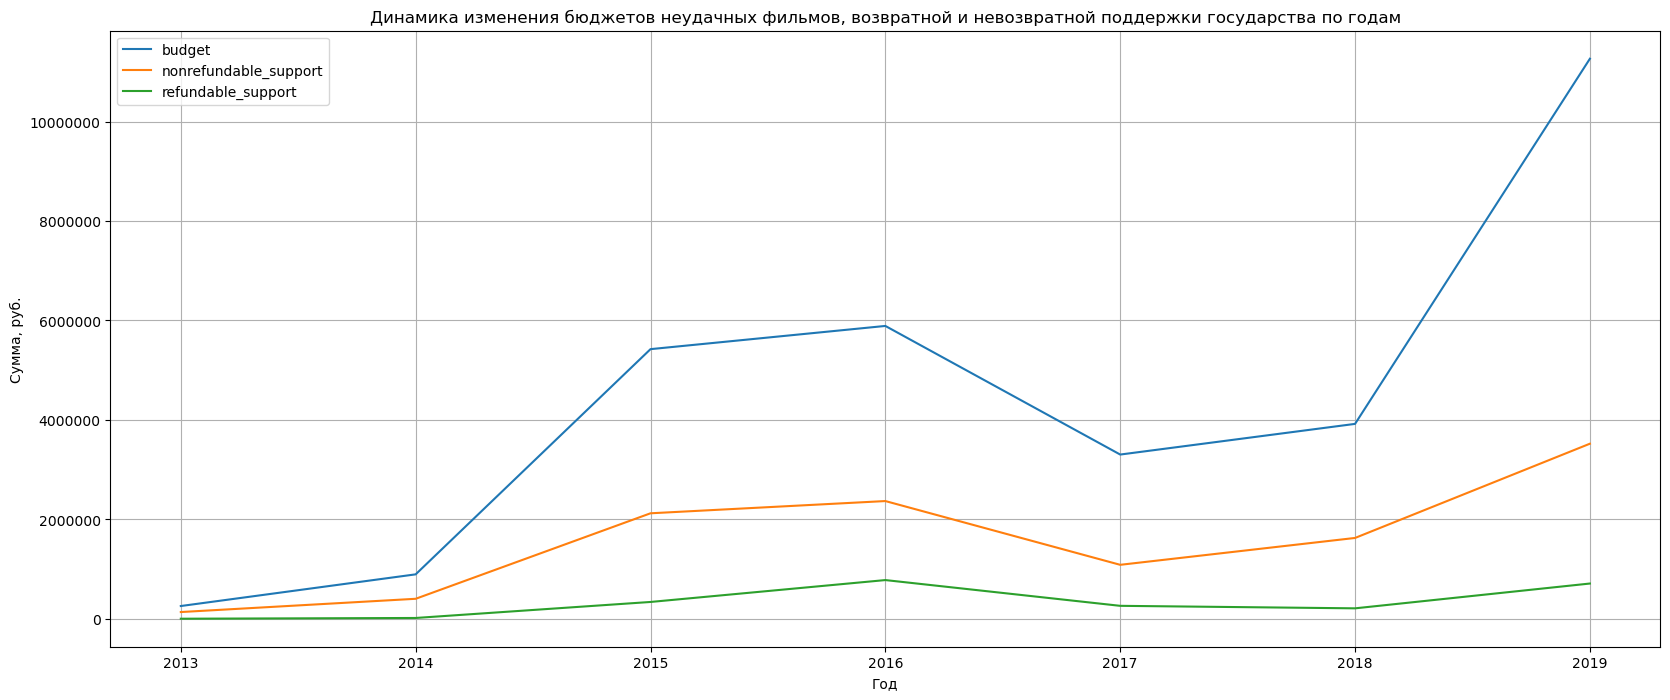

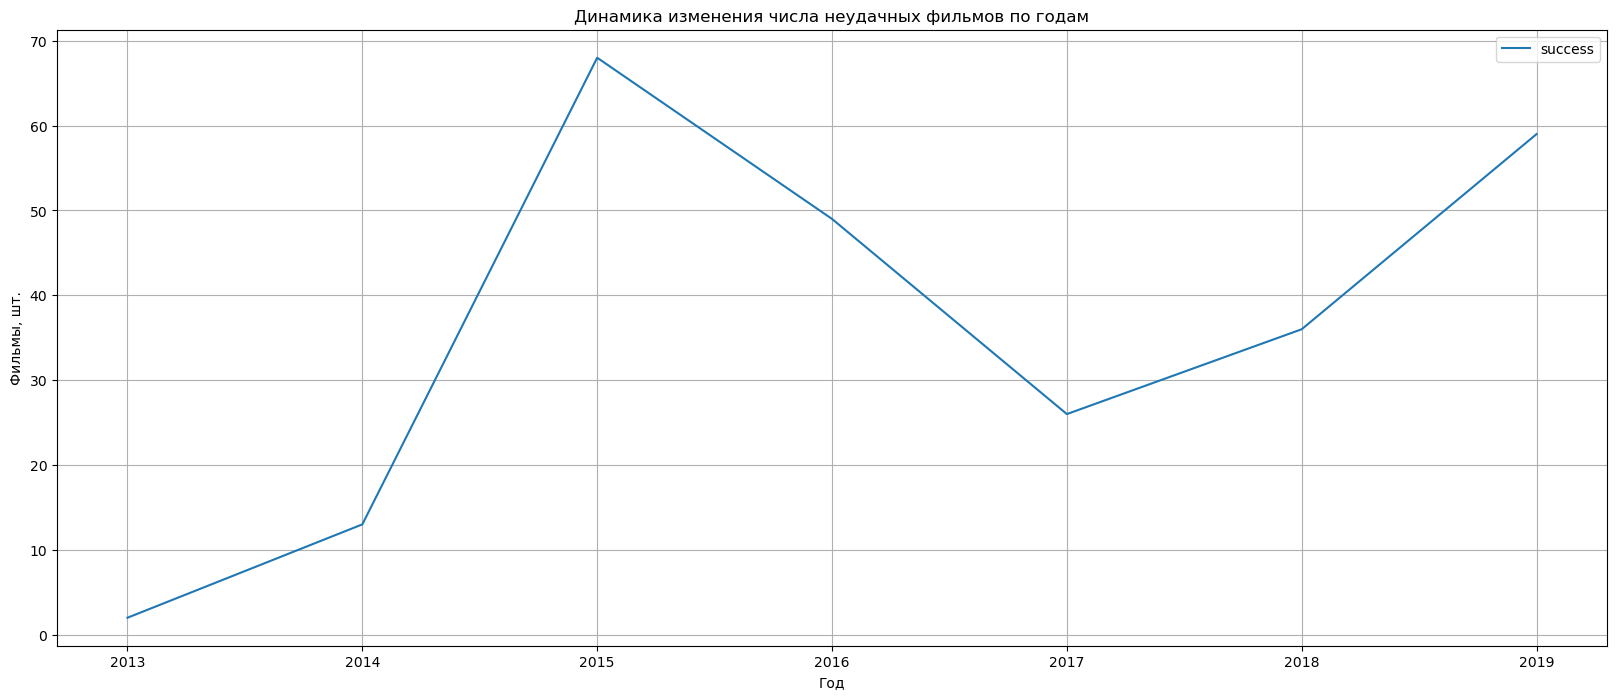

In [171]:
failed.pivot_table(index='show_year',values=['budget', 'refundable_support', 'nonrefundable_support'], aggfunc='sum').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Сумма, руб.')
plt.xlabel('Год')
plt.title('Динамика изменения бюджетов неудачных фильмов, возвратной и невозвратной поддержки государства по годам')
plt.ticklabel_format(style='plain')
plt.show()
failed.pivot_table(index='show_year',values='success', aggfunc='count').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Фильмы, шт.')
plt.xlabel('Год')
plt.title('Динамика изменения числа неудачных фильмов по годам')
plt.show()

Печально наблюдать, что график выделявшихся бюджетов практически повторяет график провалов фильмов. Нездоровая тенденция, скорее всего, есть, и, как уже было написано выше, необходима смена всего подхода к оценке успешности проекта и практики финансирования.

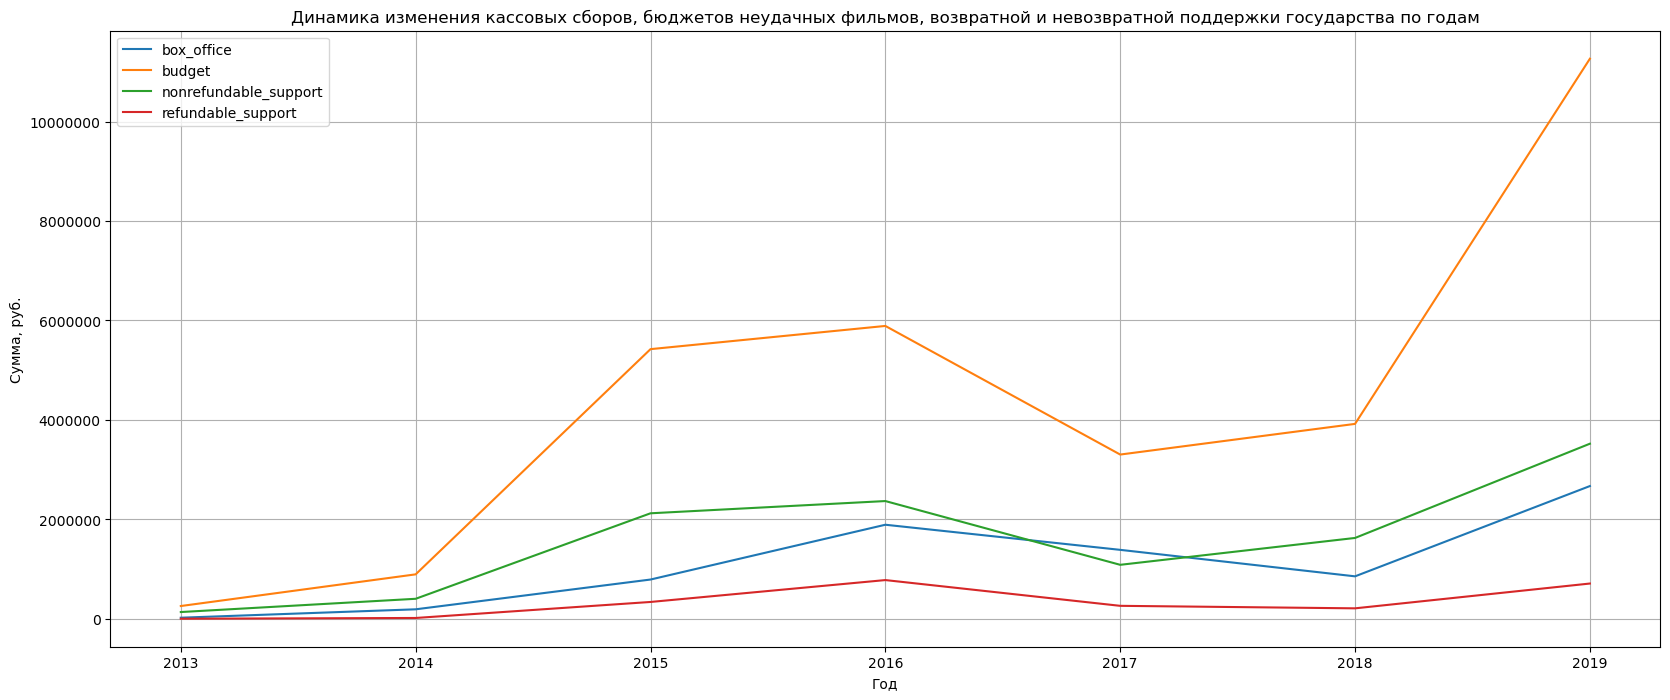

In [172]:
failed.pivot_table(index='show_year',values=['budget', 'refundable_support', 'nonrefundable_support', 'box_office'], aggfunc='sum').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Сумма, руб.')
plt.xlabel('Год')
plt.title('Динамика изменения кассовых сборов, бюджетов неудачных фильмов, возвратной и невозвратной поддержки государства по годам')
plt.ticklabel_format(style='plain')
plt.show()

А эти графики интересны как минимум тем, что сборы покрывают только возвратную поддержку государства. То есть, как факт, государство не всегда находится в полном минусе, поддерживая киноиндустрию. Однако, уровень невозвратной поддержки оказывается  практически всегда выше сборов неудачных картин. При этом, определенная тенденция существует и количество денег в итоге не превращается в качество конечного продукта, и, к сожалению, следует предположить, что действующая модель работы киноиндустрии в России с наличием господдержки неактуальная и не отражает действительных реалий и нужд отечественного зрителя. Подход и парадигма должны быть изменены, иначе в текущих условиях в кино зрителя будет ждать, скорее всего, только киномусор.

#### Дополнительные исследования отечественных фильмов с господдержкой

Изучим общую динамику сборов в разрезе жанров и возрастных категорий.

In [108]:
rus_pivot = rus_film.pivot_table(index=['show_year', 'age_restriction'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
rus_pivot.sort_values('sum', ascending=False).round(2).reset_index()

,show_year,age_restriction,count,mean,median,sum
0,2018,«12+» - для детей старше 12 лет,18,326885.40,91731.25,5883937.24
1,2017,«6+» - для детей старше 6 лет,9,607205.41,416349.09,5464848.68
2,2019,«12+» - для детей старше 12 лет,15,303983.60,10933.43,4559753.94
3,2017,«12+» - для детей старше 12 лет,14,287713.55,125341.79,4027989.67
4,2016,«12+» - для детей старше 12 лет,24,117386.39,21700.59,2817273.27
5,2015,«12+» - для детей старше 12 лет,23,95701.56,19654.53,2201135.95
6,2018,«16+» - для детей старше 16 лет,19,115472.38,23720.90,2193975.13
7,2019,«6+» - для детей старше 6 лет,17,120417.65,68549.52,2047100.02
8,2016,«6+» - для детей старше 6 лет,11,182295.39,31517.78,2005249.26
9,2015,«6+» - для детей старше 6 лет,17,116709.50,38334.50,1984061.58


In [109]:
rus_pivot = rus_film.pivot_table(index=['main_genre'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
rus_pivot.sort_values('sum', ascending=False).round(2).reset_index()

,main_genre,count,mean,median,sum
0,комедия,73,170958.60,24101.21,12479977.45
1,драма,87,109090.16,3181.22,9490844.10
2,мультфильм,30,187400.47,94940.31,5622014.13
3,спорт,3,989256.13,168688.86,2967768.39
4,фантастика,10,171820.43,55019.78,1718204.28
5,история,4,363867.06,364283.97,1455468.23
6,приключения,6,200932.83,115738.72,1205596.98
7,военный,9,113074.50,22723.58,1017670.47
8,фэнтези,11,90530.60,29822.15,995836.61
9,ужасы,10,71012.32,30493.81,710123.19


In [110]:
rus_pivot = rus_film.pivot_table(index='age_restriction',values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
rus_pivot.sort_values('sum', ascending=False).round(2).reset_index()

,age_restriction,count,mean,median,sum
0,«12+» - для детей старше 12 лет,100,199579.64,23365.69,19957963.76
1,«6+» - для детей старше 6 лет,65,205907.56,66504.72,13383991.70
2,«16+» - для детей старше 16 лет,120,63820.52,8195.31,7658462.64
3,«18+» - запрещено для детей,28,20005.67,1828.56,560158.73
4,«0+» - для любой зрительской аудитории,5,110586.55,32244.81,552932.75


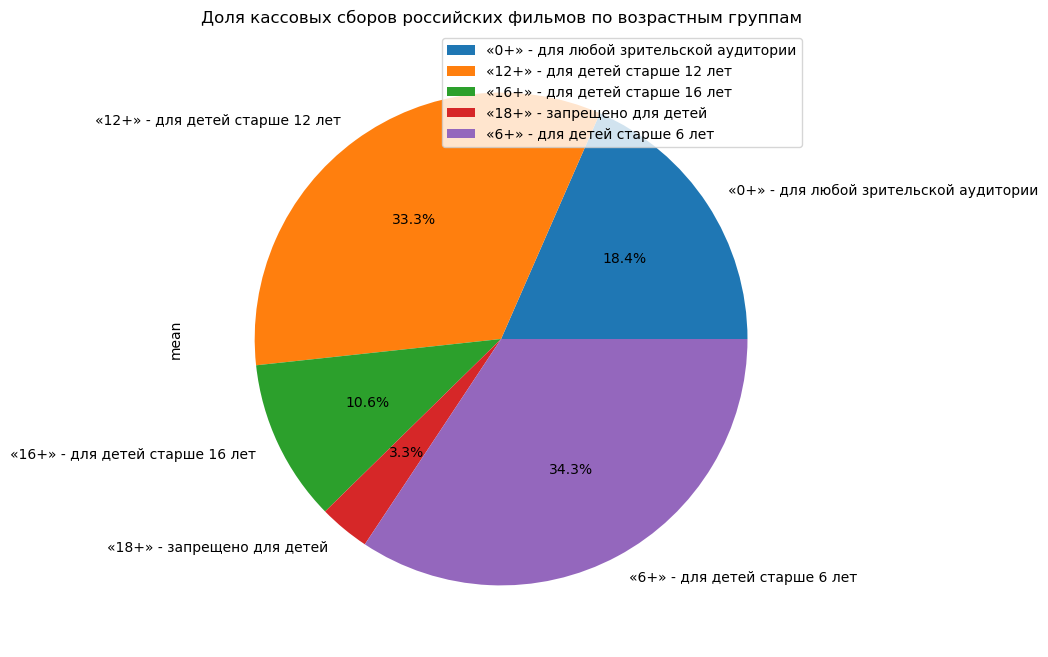

In [173]:
rus_pivot.plot(x='age_restriction',y='mean',kind='pie',grid=True,figsize=(20,8),legend=True, autopct='%1.1f%%')
plt.title('Доля кассовых сборов российских фильмов по возрастным группам')
plt.show()

Как и с общим прокатом, прокат российских фильмов возглавляют фильмы с возрастным рейтингом 6+ и 12+. Их сборы достаточно сопоставимы, что и наблюдалось в исследовании общих данных по прокату.

Интересно обратить внимание, что больше всего сборов приходится на комедии и драмы, а почетное третье место занимают мультфильмы. Также примечательно, что в десятке лучших находятся и военные фильмы, поскольку еще со времен СССР фильмы про войну зритель очень любит смотреть, а сами фильмы у нас умеют снимать. Ради интереса можно отдельно посмотреть, что это за фильмы.

In [112]:
rus_film.query('main_genre == "военный" ')

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,state_support,success
2083,2084,Дорога на Берлин,111001315.00,2015-02-17 12:00:00+00:00,Художественный,"ООО ""Продюсерская компания Александра Литвинов...",Россия,С.Попов,"А.Литвинов, К.Шахназаров",«12+» - для детей старше 12 лет,...,89782.31,Министерство культуры,6.20,"военный,драма,история",22723.58,2015,военный,С.Попов,0.50,не окупился
2534,2535,72 часа,111011815.00,2015-07-15 12:00:00+00:00,Художественный,"ООО ""Продюсерская компания Николая Расторгуева""",Россия,К.Ангелина,"И.Николенко, Н.Расторгуев",«12+» - для детей старше 12 лет,...,55729.42,"Министерство культуры, Фонд кино",7.00,"военный,драма",10355.54,2015,военный,К.Ангелина,0.66,не окупился
2568,2569,Единичка.,111004515.00,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,К.Белевич,"Р.Дишдишян, ООО ""ММЕ"", ООО ""Беркана""",«12+» - для детей старше 12 лет,...,80324.14,Министерство культуры,6.70,"военный,драма",2220.98,2015,военный,К.Белевич,0.62,не окупился
2857,2858,28 Панфиловцев,111000916.00,2016-01-27 12:00:00+00:00,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,...,85384.00,Министерство культуры,7.50,"военный,драма,история",363622.80,2016,военный,К.Дружинин,0.35,окупился
3351,3352,Рай (2016),111015716.00,2016-09-20 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр А.С.Кончаловского"", Dr...","Россия, Германия",А.Кончаловский,"А.Кончаловский, Ф.Дайле",«16+» - для детей старше 16 лет,...,287802.71,Министерство культуры,6.80,"военный,драма,история",51704.99,2016,военный,А.Кончаловский,0.12,не окупился
3707,3708,Три дня до весны.,111001717.00,2017-03-28 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Касаткин,Э.Пичугин,«12+» - для детей старше 12 лет,...,128570.00,Фонд кино,6.30,"военный,детектив",8667.19,2017,военный,А.Касаткин,0.62,не окупился
5619,5620,Несокрушимый,111011117.00,2018-02-22 12:00:00+00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,К.Максимов,"О.Погодина, А.Пиманов, Д.Анисимов",«12+» - для детей старше 12 лет,...,150000.00,Министерство культуры,5.50,"военный,драма,история",253575.23,2018,военный,К.Максимов,0.33,окупился
5828,5829,Прощаться не будем,111003418.00,2018-06-21 12:00:00+00:00,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,...,109814.24,Министерство культуры,5.80,"военный,драма,история",5539.97,2018,военный,П.Дроздов,0.32,не окупился
5851,5852,СОБИБОР (SOBIBOR),111004318.00,2018-04-24 12:00:00+00:00,Художественный,"ООО ""Фонд национального кино ""Патриот""",Россия,"К.Хабенский, А.Малюков","Э.Айнулова, М.Журомская",«12+» - для детей старше 12 лет,...,298500.00,Министерство культуры,6.40,"военный,драма",299260.19,2018,военный,К.Хабенский,0.20,окупился


Интересно, что окупились только три фильма из девяти, и как минимум один из них - вполне заслуженно (28 панфиловцев), учитывая, что была развернута мощная краудфандинговая кампания, и фильм среди всех "фильмов про войну" имеет наивысшую оценку.

In [113]:
pivot_2013_2019 = data.query('show_year >= 2013')
genre_pivot = pivot_2013_2019.pivot_table(index=['main_genre'],values='box_office', aggfunc={'sum', 'count', 'mean', 'median'})
genre_pivot.sort_values('sum', ascending=False).round(2).reset_index()

,main_genre,count,mean,median,sum
0,фантастика,161,316671.37,58778.32,50984091.19
1,мультфильм,272,135870.66,6257.56,36956818.91
2,боевик,210,131420.98,18879.15,27598406.30
3,фэнтези,119,222757.01,5170.33,26508083.75
4,комедия,331,73943.52,4674.74,24475306.14
5,драма,628,30460.79,2100.58,19129378.00
6,ужасы,250,66496.29,12475.25,16624073.64
7,триллер,199,38681.54,5517.85,7697627.08
8,спорт,5,624431.09,152779.07,3122155.43
9,история,18,156613.53,4382.30,2819043.53


Если сравнить срез по жанрам и сборам со срезом по общим данным за аналогичный период, то видно, что на первое место выходят фантастика, мультфильмы, боевики. Лидеры отечественной индустрии, комедии и драмы, только на 4 и 5 местах списка. Это в принципе неудивительно, если понимать, что в части производства фантастики и боевиков наши авторы не преуспевали, наверное, никогда.

Если сопоставить распределение по жанрам и возрастные рейтинги, становится понятно, почему так происходит. Фантастика и мультфильмы - наверное, основные объекты интереса детей 6+ и 12+. При этом интересно их смотреть и взрослым и детям. Этим и обсуловлены высокие сборы данных жанров.

Теперь построим графики по сборам и бюджетам в разрезе всех отечественных фильмов.

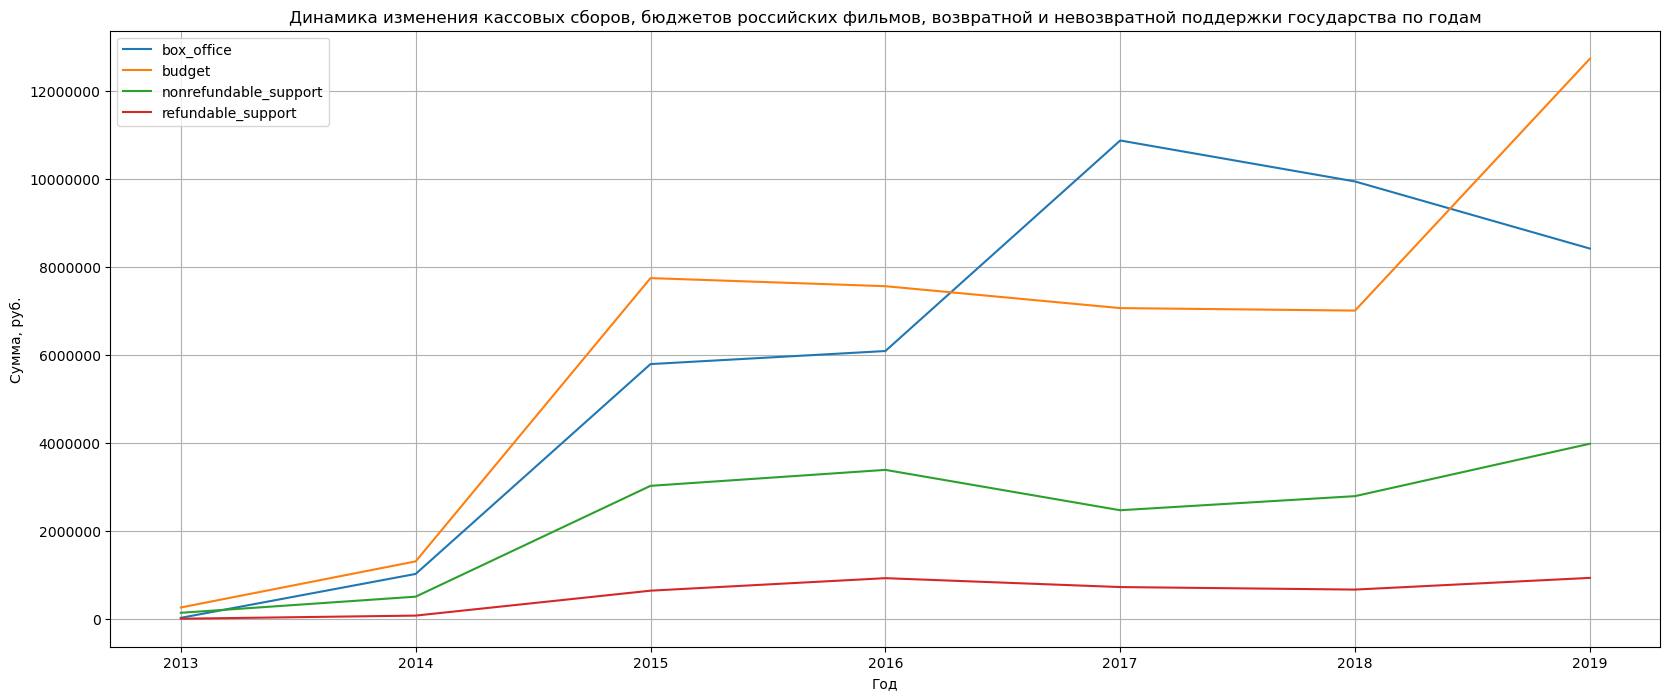

In [174]:
rus_film.pivot_table(index='show_year',values=['budget', 'refundable_support', 'nonrefundable_support', 'box_office'], aggfunc='sum').plot(grid=True,figsize=(20,8),legend=True)
plt.ylabel('Сумма, руб.')
plt.xlabel('Год')
plt.title('Динамика изменения кассовых сборов, бюджетов российских фильмов, возвратной и невозвратной поддержки государства по годам')
plt.ticklabel_format(style='plain')
plt.show()

Общая картина стала еще интереснее. Налицо общий тренд к увеличению бюджетов фильмов и всё большая разница между ними и господдержкой кинематографа в возвратном и невозвратном виде. 

Но главный интерес вызывает снижение кассовых сборов в 2018 и 2019 году при общем росте бюджетов картин. Это расхождение, скорее всего, в очередной раз подтверждает предположение об увеличении доли онлайн-кинотеатров, работающих по подписке. В будущем эта доля будет все больше и больше увеличиваться, что в итоге должно привести к изменению методики подсчета экономики проектов и успешности фильмов. Также эти изменения будут требовать иного наполнения данных, где должны считаться показатели просмотров фильмов, начисления за клиентов и отчисления от их абонентской платы. Иными словами, будет необходимо конвергентное исследование рынка оффлайн и онлайн кино вместо оценки только оффлайна, и вместе с этим будет необходима переработка всей модели отечественного кино.

#### Выводы по отечественному кинематографу

Период с 2013 по 2019 год был скорее неудачным, чем удачным, для российского кино. Доля успешных фильмов, которые окупились, весьма мала. Государство старается поддерживать ииндустрию на плаву, но зритель по-прежнему относится к отечественному кинематографу с подозрением и оценки в районе 5.5 - 6.7 баллов более чем красноречиво говорят об этом.

Отечественное кино с точки зрения экономики все еще достаточно доходно, но уже наметилась тенденция к снижению сборов при увеличении бюджетов картин. 

Самыми многочисленными являются российские фильмы с возрастным рейтингом 6+ и 12+, как и в общем разрезе кинорынка России. Самым популярным жанром является комедия и драма, но также сильны позиции мультипликации. Основной источник дохода в данному случае, это, скорее всего, семьи с детьми, которые ходят вместе в кинотеатры.

Общая модель функционирования российской киноиндустрии в господдержкой, а также оценка успешности кинопроектов должны быть пересмотрены, поскольку несмотря на небольшой рост успешности продуктов, средняя оценка зрителя изменяется слабо. Есть отдельные исключения из данного правила, но они больше его подтверждают своим существованием.

Для правильной оценки киноиндустрии необходимо полностью изменить подход и ориентироваться не на одни экономические факторы, а на комплексное соотношение удовлетворенности зрителя, окупаемости проекта, рекламы проекта и актуальности самого произведения,.

При этом, нельзя говорить, что поддержка государства неэффективна, поскольку часть фильмов все же выстреливает (к сожалению, чаще всего из-за агрессивной рекламной кампании). Да и в иных странах, где кинодело более развито, в тех же США, более чем достаточно провальных проектов. С тем лишь нюансом, что в случае провала они не выходят на мировой рынок и не попадают к нам в кинотеатры.

Министерству культуры и Фонду Кино необходимо стать более мобильными и менее реактивными в принятии решений и намечании дальнейших действий. По моему мнению, только проактивная позиция и стремление действовать наперед смогут исправить к лучшему ситуацию в российском кинематографе.

### Общий вывод

Российский рынок кинематографа весьма интересен для исследования. В рамках проведенных операций было установлено, что:

1. После введения в эксплуатацию ЕАИС стало возможным отслеживать динамику сборов фильмов и успешность государственного финансирования.
2. С течением времени кассовые сборы росли, достигнув максимума в 2018 году. К 2019 году и далее намечается тенденция к спаду ввиду роста популярности онлайн-сервисов по просмотру кино.
3. Самыми доходными фильмами являются фильмы с рейтингом 6+ и 12+ за счет того, что на них часто ходят всей семьей и вместо одного зрителя, который является ЦА продукта, производитель получает минимум одного дополнительного.
4. С 2013 года из более 300 российских фильмов, получивших господдержку, окупились только 79.
5. Среди неокупившихся фильмов полученная их авторами возвратная господержка была ниже итоговых кассовых сборов, что позволило сгладить последствия провала фильма для бюджета ФК.
6. Популярные жанры как в российском кинематографе так и на российском кинорынке - комедии, фантастика, мультфильмы и боевики. Среди фильмов российского производства преобладают комедии и драмы.
7. Средние оценки отечественного кинематографа по годам колеблятся в районе 5.5 - 6.7 баллов, причем вне зависимости от успешности или неуспешности фильма.
8. Подтверждается предположение о переходе всё большего количества зрителей в онлайн-кинотеатры, что снижает показатели кассовой выручки по оффлайновым кинотеатрам.
9. Становится очевидной необходимость пересмотра модели оценки эффективности государственной поддержки кинематографа ввиду тенденции к увеличению количества неокупающихся отечественных фильмов при восходящем тренде роста бюджетов.

В рамках данного исследования необходимо заметить, что рынок кино весьма объемен и сложен. Он имеет своим закономерности и зависимости. Для более полного исследования необходимо расширить имеющийся набор данных сведениями о количестве просмотров, количестве отчислений от онлайн-сервисов и т.д. и т. п.